In [162]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import internal modules
sys.path.insert(1, '../src')
from utils.accuracy import MAE, MAPE, MSE, Error, AbsoluteError, PercentageError, AbsolutePercentageError
from execute.accuracy_evaluation import accuracy_table, accuracy_table_i

In [2]:
# read data
tse1 = pd.read_csv("../data/processed/tidy_tse1.csv", index_col=[0, 1, 2])
df = pd.read_csv("../data/processed/tidy_df.csv", index_col=[0, 1, 2])
y_test = pd.read_csv("../assets/y_hats/univariate/y_test.csv", index_col=[0, 1, 2])

# read y_hat csv
y_hats_all = pd.read_csv("./../assets/y_hats/y_hats_all.csv", index_col=[0, 1, 2])

# y_hat_umlp_tuned = pd.read_csv("./../assets/y_hats/univariate/y_hat_umlp-tuned_0905.csv", index_col=[0, 1, 2])
# y_hat_umlp_tuned.columns = ['y_hat_umlp_tuned']

y_hat_mmlp_tuned = pd.read_csv("./../assets/y_hats/multivariate/y_hat_mmlp_tuned_scaled0911.csv", index_col=[0, 1, 2])
y_hat_mmlp_tuned.columns = ['y_hat_mmlp_tuned_scaled']

In [136]:
df.describe()

,EPS,INV,AR,CAPX,GM,SA,ETR,LF
count,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000
mean,67.219409,781.733070,1273.860397,173.230231,508.658812,381.614042,0.346242,16.185539
std,690.524130,6963.552335,7971.923999,2312.546289,3497.303476,2636.875351,6.876806,0.789316
min,-37300.500000,-1248.280315,-8093.573906,-3424.537248,-30368.482179,-1970.903771,-494.716049,11.628080
25%,3.260000,90.115089,177.839614,9.381707,52.725080,39.485835,0.235611,15.645807
50%,14.880000,193.617631,355.497396,25.090398,115.000411,83.115920,0.330000,16.135532
75%,37.120000,410.684878,713.659557,65.736542,220.324184,164.602388,0.414576,16.670491
max,31202.830000,404482.462266,293004.896357,143224.389801,104813.929669,87333.560942,882.000000,22.530918


In [3]:
y_hat_mmlp_tuned

y_hat_mmlp_tuned_scaled
企業名   会計年度 四半期                         
あらた   2018 Q1                 60.607697
           Q2                 75.818980
           Q3                 61.267445
           Q4                 66.711740
      2019 Q1                108.427100
...                                 ...
ｅＢＡＳＥ 2019 Q4                -37.442333
      2020 Q1                 -7.081633
           Q2                  4.746031
           Q3               -235.246170
           Q4                 34.971806

[13068 rows x 1 columns]

In [4]:
y_hats_all

y_test    y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名   会計年度 四半期                                                            
あらた   2018 Q1   105.420000   69.340000       122.565740      122.449521   
           Q2    90.440000  105.420000        79.897110       79.998967   
           Q3   106.240000   90.440000       119.386680      119.551232   
           Q4    99.220000  106.240000        60.222049       59.996949   
      2019 Q1   116.850000   99.220000       127.203963      125.133255   
...                    ...         ...              ...             ...   
ｅＢＡＳＥ 2019 Q4    18.657982    5.290000        51.406785       36.300485   
      2020 Q1     2.010000   18.657982       -68.232333       -0.020788   
           Q2     3.810000    2.010000        19.227708       11.637899   
           Q3     3.070000    3.810000      -317.707192        3.736002   
           Q4     9.989365    3.070000        34.835646       18.235485   

                y_hat_sarima_g  y_hat_umlp  y_hat_mlm1   y_hat_mlm2  \
企業名   会計年度 四半期                                                        
あらた   2018 Q1       130.595361   111.25781  142.213501   113.490222   
           Q2        94.544504    84.75139   92.463386   157.027451   
           Q3       119.287623   114.48496  118.419913    84.545219   
           Q4        65.424073    79.35591   72.589673   111.753597   
      2019 Q1       126.004465   113.64266   98.036624   126.181789   
...                        ...         ...         ...          ...   
ｅＢＡＳＥ 2019 Q4        88.758959  -138.77140  -82.273856  1361.294861   
      2020 Q1      -980.636406  -454.12380  161.435880   -96.581389   
           Q2      -201.877901 -1139.42900 -129.129435   638.576354   
           Q3      -249.404402  -299.76132  -55.248900    47.373257   
           Q4        72.472296  -176.82642    8.203400    55.521833   

                y_hat_mlm3  y_hat_mlm4  
企業名   会計年度 四半期                          
あらた   2018 Q1   117.339606  263.859095  
           Q2   147.870649  186.013135  
           Q3    84.910297  -90.797436  
           Q4    83.042883   43.663635  
      2019 Q1   135.395355  137.056577  
...                    ...         ...  
ｅＢＡＳＥ 2019 Q4   832.541667   31.609783  
      2020 Q1  -108.274805   -8.705827  
           Q2   562.144933  -12.323521  
           Q3    -3.808247   14.509884  
           Q4   130.403399    8.147153  

[13068 rows x 10 columns]

In [5]:
y_hats_all_tuned = pd.concat([y_hats_all, y_hat_mmlp_tuned], axis=1)
y_hats_all_tuned

y_test    y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名   会計年度 四半期                                                            
あらた   2018 Q1   105.420000   69.340000       122.565740      122.449521   
           Q2    90.440000  105.420000        79.897110       79.998967   
           Q3   106.240000   90.440000       119.386680      119.551232   
           Q4    99.220000  106.240000        60.222049       59.996949   
      2019 Q1   116.850000   99.220000       127.203963      125.133255   
...                    ...         ...              ...             ...   
ｅＢＡＳＥ 2019 Q4    18.657982    5.290000        51.406785       36.300485   
      2020 Q1     2.010000   18.657982       -68.232333       -0.020788   
           Q2     3.810000    2.010000        19.227708       11.637899   
           Q3     3.070000    3.810000      -317.707192        3.736002   
           Q4     9.989365    3.070000        34.835646       18.235485   

                y_hat_sarima_g  y_hat_umlp  y_hat_mlm1   y_hat_mlm2  \
企業名   会計年度 四半期                                                        
あらた   2018 Q1       130.595361   111.25781  142.213501   113.490222   
           Q2        94.544504    84.75139   92.463386   157.027451   
           Q3       119.287623   114.48496  118.419913    84.545219   
           Q4        65.424073    79.35591   72.589673   111.753597   
      2019 Q1       126.004465   113.64266   98.036624   126.181789   
...                        ...         ...         ...          ...   
ｅＢＡＳＥ 2019 Q4        88.758959  -138.77140  -82.273856  1361.294861   
      2020 Q1      -980.636406  -454.12380  161.435880   -96.581389   
           Q2      -201.877901 -1139.42900 -129.129435   638.576354   
           Q3      -249.404402  -299.76132  -55.248900    47.373257   
           Q4        72.472296  -176.82642    8.203400    55.521833   

                y_hat_mlm3  y_hat_mlm4  y_hat_mmlp_tuned_scaled  
企業名   会計年度 四半期                                                   
あらた   2018 Q1   117.339606  263.859095                60.607697  
           Q2   147.870649  186.013135                75.818980  
           Q3    84.910297  -90.797436                61.267445  
           Q4    83.042883   43.663635                66.711740  
      2019 Q1   135.395355  137.056577               108.427100  
...                    ...         ...                      ...  
ｅＢＡＳＥ 2019 Q4   832.541667   31.609783               -37.442333  
      2020 Q1  -108.274805   -8.705827                -7.081633  
           Q2   562.144933  -12.323521                 4.746031  
           Q3    -3.808247   14.509884              -235.246170  
           Q4   130.403399    8.147153                34.971806  

[13068 rows x 11 columns]

In [6]:
indicators = {"MAPE": MAPE}

In [7]:
a = accuracy_table(y_hats_all_tuned["y_test"], y_hats_all_tuned, indicators)
a

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
MAPE,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,3.837378


multivariate MLP tuned_scaleはいい感じ?

In [8]:
ai = accuracy_table_i(y_hats_all_tuned["y_test"], y_hats_all_tuned, indicators)
ai

,,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
あらた,MAPE,0.0,0.326915,0.209451,0.199988,0.202024,0.144319,0.200535,0.298360,0.273272,1.057403,0.280263
いすゞ自動車,MAPE,0.0,1.033565,0.674522,0.596406,0.769031,0.627432,1.406949,0.509453,0.529282,3.667137,0.838838
いなげや,MAPE,0.0,1.923584,0.933579,1.239337,1.253766,1.545034,2.690945,1.532201,1.594809,2.358227,2.173016
かどや製油,MAPE,0.0,0.973943,0.612928,0.585215,0.717560,0.756591,0.964528,0.372779,0.348536,1.999852,0.833886
きんでん,MAPE,0.0,1.548829,0.151986,0.132039,0.169481,0.308766,0.184258,0.283411,0.248188,0.438089,0.232925
...,...,...,...,...,...,...,...,...,...,...,...,...
ＶＴホールディングス,MAPE,0.0,1.026698,0.980742,0.952420,0.669884,1.394830,9.619477,1.909067,2.060582,10.090009,2.045024
ＷＤＢホールディングス,MAPE,0.0,0.204655,8.063783,0.242735,10.715042,4.547131,2.983076,3.794508,3.198188,1.255252,1.060657
ＷＯＷＯＷ,MAPE,0.0,1.720739,11.013297,0.509329,17.527644,14.660058,26.716439,110.643144,104.422490,10.399048,7.501756
ＺＯＺＯ,MAPE,0.0,0.595866,0.821336,0.431233,1.034765,2.980114,2.381338,3.660596,2.500938,2.073945,1.437206


In [9]:
ai.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,3.837378
std,0.0,24.340679,225.215044,10.140076,88.594166,342.113625,50.936578,305.926501,317.366629,234.626426,17.536818
min,0.0,0.108712,0.049801,0.079664,0.071814,0.108270,0.051167,0.094949,0.090533,0.185546,0.107655
25%,0.0,0.633784,0.468086,0.496089,0.507989,0.586712,0.629979,0.663215,0.677769,1.664993,0.560870
50%,0.0,1.307412,0.978257,0.994169,1.056402,1.064089,1.286960,1.464974,1.552599,4.958196,1.144925
75%,0.0,2.604576,1.865236,1.934714,2.136072,2.290723,2.953894,3.314285,3.480510,13.595323,2.279961
max,0.0,492.518013,7428.137986,172.733304,2896.696746,11262.841325,1627.680038,10088.018752,10460.852271,5240.955894,348.793877


In [10]:
a_mspe = accuracy_table(y_hats_all_tuned["y_test"], y_hats_all_tuned, {"MSPE": MSE})
a_mspe

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
MSPE,0.0,7001.957272,606873.642797,1142.823507,93472.21465,1.391902e+06,29555.807147,1.118622e+06,1.203296e+06,513129.948051,3237.605102


In [11]:
ai_mspe = accuracy_table_i(y_hats_all_tuned["y_test"], y_hats_all_tuned, {"MSPE": MSE})
ai_mspe

,,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
あらた,MSPE,0.0,0.245053,0.093651,0.077152,0.092755,0.030662,0.057927,0.157748,0.149275,2.645720,0.141277
いすゞ自動車,MSPE,0.0,1.474316,1.622614,1.335634,1.559013,1.103290,8.717808,0.833057,1.025020,40.128369,1.802276
いなげや,MSPE,0.0,6.976108,1.578479,3.095353,2.625957,3.188831,18.385336,3.986891,4.260337,9.690904,10.417181
かどや製油,MSPE,0.0,3.595291,1.247836,0.917253,2.348806,1.339283,4.098593,0.194233,0.264342,11.525534,2.091708
きんでん,MSPE,0.0,7.445106,0.046618,0.033423,0.062291,0.153430,0.076609,0.142997,0.112530,0.265279,0.093431
...,...,...,...,...,...,...,...,...,...,...,...,...
ＶＴホールディングス,MSPE,0.0,2.281708,2.191148,2.400158,0.792844,3.815725,813.969407,8.871148,7.748390,171.535531,22.361378
ＷＤＢホールディングス,MSPE,0.0,0.113039,103.231803,0.093193,173.963446,30.862935,21.931655,29.776245,17.945771,3.330263,1.618899
ＷＯＷＯＷ,MSPE,0.0,10.486030,538.503849,0.426723,1792.105594,361.116935,3465.787441,80086.846046,72612.154257,505.325454,280.926051
ＺＯＺＯ,MSPE,0.0,0.674352,2.024270,0.262433,2.205143,15.910614,15.682700,41.131475,18.606415,12.248574,5.089504


In [12]:
ai_mspe.describe().round(2)

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,1089.0,1089.00,1.089000e+03,1089.00,1089.00,1.089000e+03,1089.00,1.089000e+03,1.089000e+03,1.089000e+03,1089.00
mean,0.0,7001.96,6.068736e+05,1142.82,93472.21,1.391902e+06,29555.81,1.118622e+06,1.203296e+06,5.131300e+05,3237.61
std,0.0,113813.69,1.999268e+07,15310.05,3027726.34,4.579483e+07,930360.65,3.684364e+07,3.962020e+07,8.904612e+06,49684.22
min,0.0,0.02,1.000000e-02,0.01,0.01,2.000000e-02,0.01,1.000000e-02,1.000000e-02,5.000000e-02,0.02
25%,0.0,0.92,4.700000e-01,0.50,0.57,5.600000e-01,0.83,9.000000e-01,9.300000e-01,5.890000e+00,0.61
50%,0.0,4.67,2.130000e+00,2.39,2.73,2.460000e+00,4.40,5.670000e+00,6.110000e+00,6.090000e+01,3.25
75%,0.0,23.12,1.134000e+01,11.40,16.45,1.798000e+01,28.84,3.883000e+01,4.425000e+01,5.796300e+02,17.39
max,0.0,2895921.71,6.597593e+08,356442.99,99913644.24,1.511232e+09,30700724.33,1.215842e+09,1.307469e+09,2.164291e+08,1294620.40


MMLP tuned scaleは、1を超えるエラーが低く抑えられてる?(Upper boundすると意味なさそう?)

ベスト予測の手法別企業カウント

In [13]:
for i in ai.columns[1:]:
    print(i)
    print((ai.iloc[:, 1:].idxmin(axis=1) == i).sum(), ((ai.iloc[:, 1:].idxmin(axis=1) == i).sum()/len(ai)).round(2))

y_hat_rw
122 0.11
y_hat_sarima_br
223 0.2
y_hat_sarima_f
144 0.13
y_hat_sarima_g
128 0.12
y_hat_umlp
169 0.16
y_hat_mlm1
79 0.07
y_hat_mlm2
52 0.05
y_hat_mlm3
44 0.04
y_hat_mlm4
7 0.01
y_hat_mmlp_tuned_scaled
121 0.11


In [14]:
ai["y_hat_mmlp_tuned_scaled"].sort_values(ascending=False)[:10]

山田コンサルティンググループ  MAPE    348.793877
テイクアンドギヴ・ニーズ    MAPE    258.856743
オカムラ            MAPE    217.870160
タムラ製作所          MAPE    199.638057
さくらインターネット      MAPE    119.233428
大阪製鉄            MAPE    104.091371
第一三共            MAPE     90.018934
東京機械製作所         MAPE     88.482533
ソースネクスト         MAPE     52.843929
ＴＰＲ             MAPE     52.580944
Name: y_hat_mmlp_tuned_scaled, dtype: float64

<Figure size 1152x648 with 0 Axes>

/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_

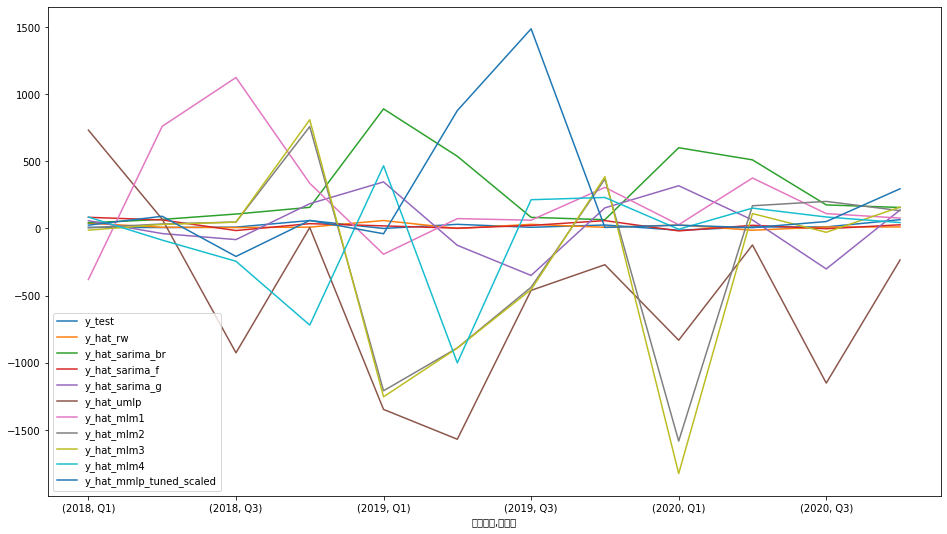

In [145]:
f = ai["y_hat_mmlp_tuned_scaled"].sort_values(ascending=False)[:10].index.get_level_values(0)[0]
y_hats_all_tuned.loc[f].plot(figsize=(16, 9))

In [15]:
ai["y_hat_mmlp_tuned_scaled"].sort_values(ascending=True)[:10]

関電工        MAPE    0.107655
信越化学工業     MAPE    0.128849
ニップン       MAPE    0.133136
光通信        MAPE    0.140423
ニチレイ       MAPE    0.148909
上組         MAPE    0.151030
ハマキョウレックス  MAPE    0.179619
東京エレクトロン   MAPE    0.180095
ティーガイア     MAPE    0.186892
ＭＡＲＵＷＡ     MAPE    0.186993
Name: y_hat_mmlp_tuned_scaled, dtype: float64

/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wang_sihan/.local/lib/python3.8/site-packages/matplotlib/backends/backend_

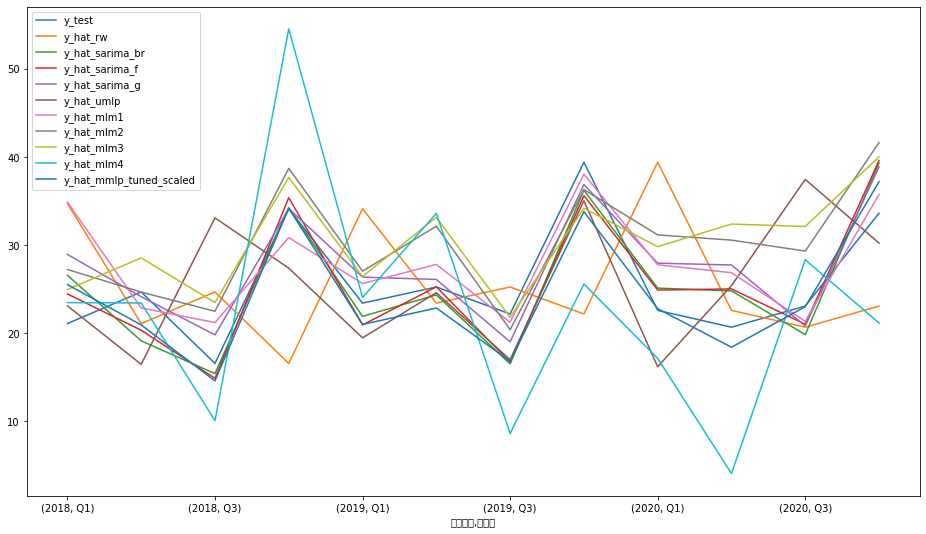

In [153]:
f = ai["y_hat_mmlp_tuned_scaled"].sort_values(ascending=True)[:10].index.get_level_values(0)[0]
y_hats_all_tuned.loc[f].plot(figsize=(16, 9))

tuningによる各予測サンプルごとのエラーを見てみる

In [16]:
error_p_abs = []
for i in y_hats_all_tuned.columns:
    error_p_abs.append(AbsolutePercentageError(y_hats_all_tuned["y_test"], y_hats_all_tuned[i]))
error_p_abs = pd.DataFrame(error_p_abs).T
error_p_abs.columns = y_hats_all_tuned.columns
error_p_abs.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,13068.0,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,3.837378
std,0.0,83.569621,778.990262,33.688884,305.682629,1179.741370,171.827446,1057.593320,1096.885113,715.645658,56.772584
min,0.0,0.000000,0.000127,0.000035,0.000039,0.000044,0.000121,0.000355,0.000041,0.000266,0.000018
25%,0.0,0.240803,0.186371,0.177526,0.181412,0.265654,0.224952,0.234663,0.242207,0.641522,0.229096
50%,0.0,0.567493,0.457172,0.461149,0.464577,0.621202,0.574726,0.608518,0.639819,1.843934,0.519802
75%,0.0,1.313804,1.052149,1.085723,1.154855,1.274750,1.495443,1.622538,1.728114,6.113956,1.227357
max,0.0,5895.000000,88978.127205,2068.166620,34626.006762,134665.300000,19193.225310,120789.437098,125258.155053,50075.354129,3937.530700


ベスト予測の手法別予測サンプルカウント

In [17]:
for i in error_p_abs.columns[1:]:
    print(i)
    print((error_p_abs.iloc[:, 1:].idxmin(axis=1) == i).sum(), ((error_p_abs.iloc[:, 1:].idxmin(axis=1) == i).sum()/len(error_p_abs)).round(2))

y_hat_rw
1690 0.13
y_hat_sarima_br
1237 0.09
y_hat_sarima_f
1547 0.12
y_hat_sarima_g
1400 0.11
y_hat_umlp
1498 0.11
y_hat_mlm1
1381 0.11
y_hat_mlm2
997 0.08
y_hat_mlm3
1032 0.08
y_hat_mlm4
811 0.06
y_hat_mmlp_tuned_scaled
1475 0.11


10%くらいはMMLPが一番いいけど、、数はSARIMA F、Random walk, UMLPには負けてる

In [18]:
error_p_sq = error_p_abs ** 2
# aggregate table
a_table = pd.DataFrame([error_p_abs.mean(), 
                                  error_p_sq.mean(), 
                                  (error_p_abs == 1).sum() / len(error_p_abs)
                                 ])
a_table.index = ["MAPE", "MSPE", "Large Forecast Error"]
a_table.columns = y_hats_all_tuned.columns
a_table = accuracy_table.T

a_table

,MAPE,MSPE,Large Forecast Error
y_test,0.000000,0.000000e+00,0.0
y_hat_rw,4.313953,7.001957e+03,0.0
y_hat_sarima_br,9.708306,6.068736e+05,0.0
y_hat_sarima_f,2.823022,1.142824e+03,0.0
y_hat_sarima_g,6.123333,9.347221e+04,0.0
y_hat_umlp,14.806769,1.391902e+06,0.0
y_hat_mlm1,5.778863,2.955581e+04,0.0
y_hat_mlm2,14.285043,1.118622e+06,0.0
y_hat_mlm3,15.209637,1.203296e+06,0.0
y_hat_mlm4,31.944189,5.131299e+05,0.0


# Upper boundを適用してみる

In [19]:
#Upper bound
error_p_abs_ub = error_p_abs.copy()
error_p_abs_ub[error_p_abs_ub > 1] = 1

In [20]:
error_p_abs_ub.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,13068.0,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,0.0,0.584368,0.526985,0.526749,0.534064,0.603029,0.585543,0.597033,0.609444,0.805381,0.566839
std,0.0,0.362200,0.364672,0.367901,0.371721,0.354113,0.371048,0.371075,0.370876,0.313807,0.362498
min,0.0,0.000000,0.000127,0.000035,0.000039,0.000044,0.000121,0.000355,0.000041,0.000266,0.000018
25%,0.0,0.240803,0.186371,0.177526,0.181412,0.265654,0.224952,0.234663,0.242207,0.641522,0.229096
50%,0.0,0.567493,0.457172,0.461149,0.464577,0.621202,0.574726,0.608518,0.639819,1.000000,0.519802
75%,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# large error count
(error_p_abs_ub == 1).sum()

y_test                        0
y_hat_rw                   4209
y_hat_sarima_br            3469
y_hat_sarima_f             3565
y_hat_sarima_g             3743
y_hat_umlp                 4122
y_hat_mlm1                 4490
y_hat_mlm2                 4692
y_hat_mlm3                 4883
y_hat_mlm4                 8468
y_hat_mmlp_tuned_scaled    3955
dtype: int64

In [22]:
# large error propotion
(error_p_abs_ub == 1).sum() / len(error_p_abs_ub)

y_test                     0.000000
y_hat_rw                   0.322084
y_hat_sarima_br            0.265458
y_hat_sarima_f             0.272804
y_hat_sarima_g             0.286425
y_hat_umlp                 0.315427
y_hat_mlm1                 0.343587
y_hat_mlm2                 0.359045
y_hat_mlm3                 0.373661
y_hat_mlm4                 0.647995
y_hat_mmlp_tuned_scaled    0.302648
dtype: float64

UMLPよりはすくないけど、、Univariate Linearよりは多い。

In [119]:
for i in error_p_abs_ub.columns[1:]:
    print(i)
    if i == "y_hat_rw":
        print((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum()-len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]), (((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum()-len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]))/len(error_p_abs)).round(2))
    else:
        print((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum(), ((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum()/len(error_p_abs)).round(2))
print("Large error")
print(len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]), (len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]) / len(error_p_abs_ub)))

y_hat_rw
1546 0.12
y_hat_sarima_br
1156 0.09
y_hat_sarima_f
1441 0.11
y_hat_sarima_g
1334 0.1
y_hat_umlp
1321 0.1
y_hat_mlm1
1282 0.1
y_hat_mlm2
931 0.07
y_hat_mlm3
972 0.07
y_hat_mlm4
724 0.06
y_hat_mmlp_tuned_scaled
1357 0.1
Large error
1004 0.07682889501071319


In [23]:
error_p_sq_ub = error_p_abs_ub ** 2
# aggregate table
accuracy_table_ub = pd.DataFrame([error_p_abs_ub.mean(), 
                                  error_p_sq_ub.mean(), 
                                  (error_p_abs_ub == 1).sum() / len(error_p_abs_ub)
                                 ])
accuracy_table_ub.index = ["MAPE", "MSPE", "Large Forecast Error"]
accuracy_table_ub.columns = y_hats_all_tuned.columns
accuracy_table_ub = accuracy_table_ub.T

accuracy_table_ub

,MAPE,MSPE,Large Forecast Error
y_test,0.000000,0.000000,0.000000
y_hat_rw,0.584368,0.472665,0.322084
y_hat_sarima_br,0.526985,0.410689,0.265458
y_hat_sarima_f,0.526749,0.412805,0.272804
y_hat_sarima_g,0.534064,0.423390,0.286425
y_hat_umlp,0.603029,0.489031,0.315427
y_hat_mlm1,0.585543,0.480527,0.343587
y_hat_mlm2,0.597033,0.494134,0.359045
y_hat_mlm3,0.609444,0.508960,0.373661
y_hat_mlm4,0.805381,0.747106,0.647995


ヘタクソなやつを特定

In [24]:
error_p_abs["y_hat_mmlp_tuned_scaled"].sort_values(ascending=False)[:50]

企業名              会計年度  四半期
山田コンサルティンググループ   2019  Q1     3937.530700
テイクアンドギヴ・ニーズ     2020  Q3     3025.496444
オカムラ             2020  Q1     2610.399300
タムラ製作所           2019  Q4     1726.533700
大阪製鉄             2020  Q3     1209.751260
第一三共             2020  Q4     1043.950875
東京機械製作所          2018  Q2     1023.730615
タムラ製作所           2019  Q1      634.419600
ＴＰＲ              2019  Q4      618.390091
さくらインターネット       2020  Q1      593.111196
日立建機             2020  Q2      478.491250
タカミヤ             2020  Q4      467.686250
東海旅客鉄道           2020  Q3      461.741043
サニックス            2018  Q3      431.947000
旭化成              2019  Q4      386.271171
はせがわ             2020  Q4      384.707700
さくらインターネット       2019  Q3      380.201052
                 2020  Q2      363.357621
ソースネクスト          2020  Q4      312.604762
東祥               2020  Q4      298.487672
三機工業             2020  Q1      267.916524
ホッカンホールディングス     2020  Q1      258.326256
日水製薬             2019  Q1      255.334967
日本水産   

時間かかりすぎて多っぽいからtrialを300-->100に減らしたけど、時間がかかってたのはepoch10000が原因かも?
trial 300, epoch 1000ならまだ改善かつ時間をかけずに行けるかも??

# 予測精度の高いサンプル、低いサンプルの原因特定

In [25]:
error_p_abs

y_test  y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名   会計年度 四半期                                                      
あらた   2018 Q1      0.0  0.342250         0.162642        0.161540   
           Q2      0.0  0.165635         0.116573        0.115447   
           Q3      0.0  0.148720         0.123745        0.125294   
           Q4      0.0  0.070752         0.393045        0.395314   
      2019 Q1      0.0  0.150877         0.088609        0.070888   
...                ...       ...              ...             ...   
ｅＢＡＳＥ 2019 Q4      0.0  0.716475         1.755217        0.945574   
      2020 Q1      0.0  8.282578        34.946435        1.010342   
           Q2      0.0  0.472441         4.046642        2.054567   
           Q3      0.0  0.241042       104.487685        0.216939   
           Q4      0.0  0.692673         2.487273        0.825490   

                y_hat_sarima_g  y_hat_umlp  y_hat_mlm1  y_hat_mlm2  \
企業名   会計年度 四半期                                                       
あらた   2018 Q1         0.238810    0.055377    0.349018    0.076553   
           Q2         0.045384    0.062899    0.022373    0.736261   
           Q3         0.122813    0.077607    0.114645    0.204205   
           Q4         0.340616    0.200202    0.268397    0.126321   
      2019 Q1         0.078344    0.027448    0.161005    0.079861   
...                        ...         ...         ...         ...   
ｅＢＡＳＥ 2019 Q4         3.757157    8.437642    5.409580   71.960454   
      2020 Q1       488.878809  226.932239   79.316358   49.050442   
           Q2        53.986326  300.062730   34.892240  166.605342   
           Q3        82.239219   98.642124   18.996384   14.431028   
           Q4         6.254945   18.701467    0.178787    4.558094   

                y_hat_mlm3  y_hat_mlm4  y_hat_mmlp_tuned_scaled  
企業名   会計年度 四半期                                                   
あらた   2018 Q1     0.113068    1.502932                 0.425084  
           Q2     0.635014    1.056757                 0.161665  
           Q3     0.200769    1.854645                 0.423311  
           Q4     0.163043    0.559931                 0.327638  
      2019 Q1     0.158711    0.172927                 0.072083  
...                    ...         ...                      ...  
ｅＢＡＳＥ 2019 Q4    43.621206    0.694169                 3.006773  
      2020 Q1    54.868062    5.331257                 4.523200  
           Q2   146.544602    4.234520                 0.245677  
           Q3     2.240471    3.726347                77.627417  
           Q4    12.054223    0.184417                 2.500904  

[13068 rows x 11 columns]

In [26]:
error_p_abs.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,13068.0,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,3.837378
std,0.0,83.569621,778.990262,33.688884,305.682629,1179.741370,171.827446,1057.593320,1096.885113,715.645658,56.772584
min,0.0,0.000000,0.000127,0.000035,0.000039,0.000044,0.000121,0.000355,0.000041,0.000266,0.000018
25%,0.0,0.240803,0.186371,0.177526,0.181412,0.265654,0.224952,0.234663,0.242207,0.641522,0.229096
50%,0.0,0.567493,0.457172,0.461149,0.464577,0.621202,0.574726,0.608518,0.639819,1.843934,0.519802
75%,0.0,1.313804,1.052149,1.085723,1.154855,1.274750,1.495443,1.622538,1.728114,6.113956,1.227357
max,0.0,5895.000000,88978.127205,2068.166620,34626.006762,134665.300000,19193.225310,120789.437098,125258.155053,50075.354129,3937.530700


[]

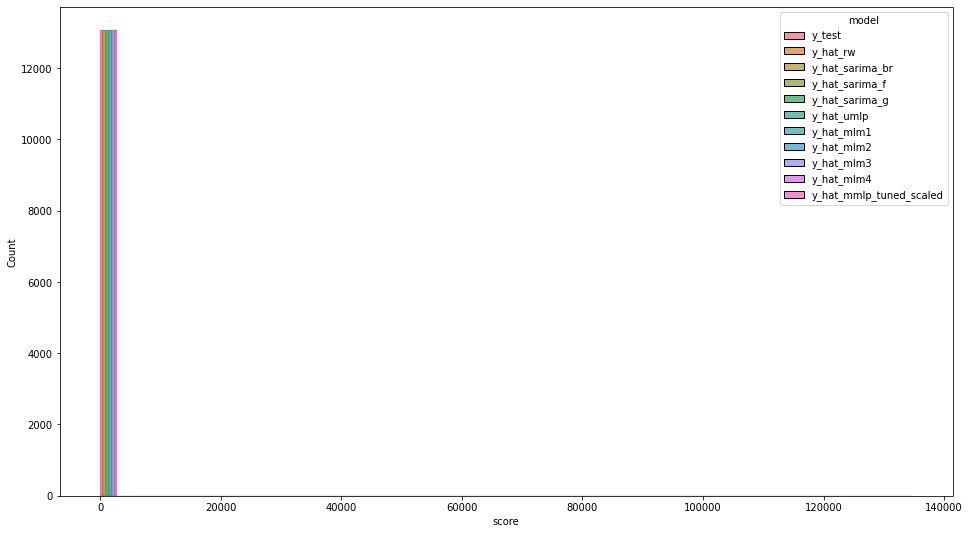

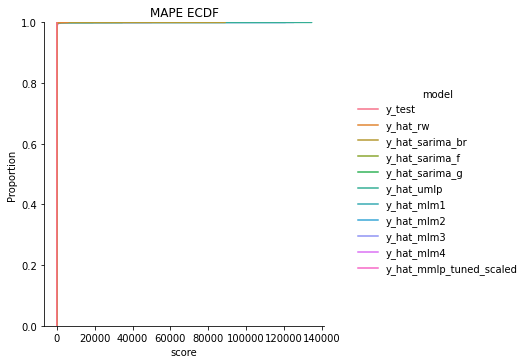

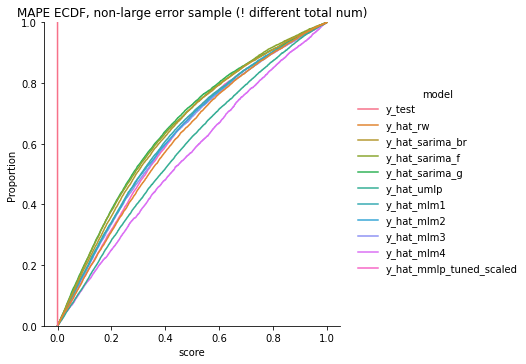

In [27]:
# melt dataframe for plotting
error_melt = error_p_abs.reset_index().melt(id_vars=error_p_abs.index.names, var_name="model", value_name="score")

plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=error_melt, x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF")
sns.displot(data=error_melt[error_melt["score"] < 1], x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF, non-large error sample (! different total num)")
plt.plot()

Text(0.5, 1.0, 'MAPE ECDF, non-large error sample (! different total num)')

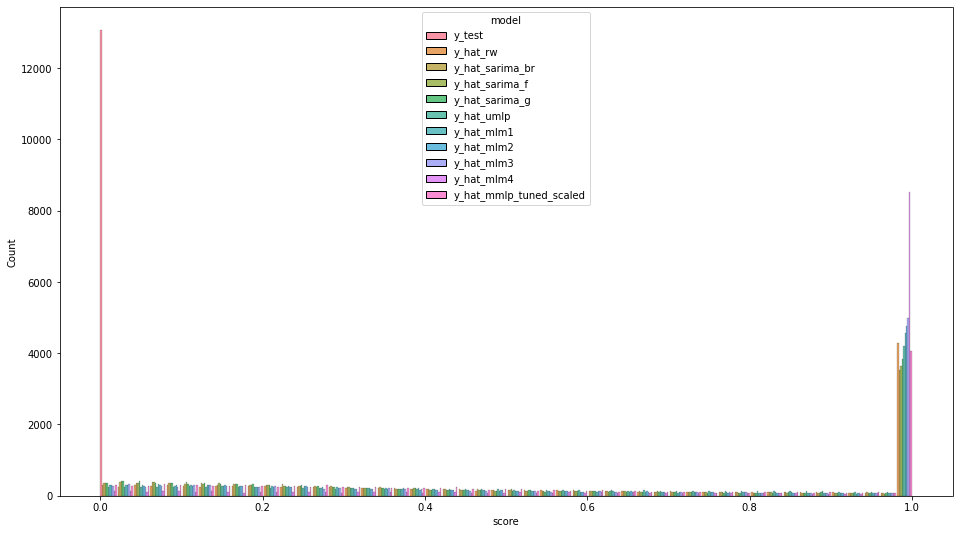

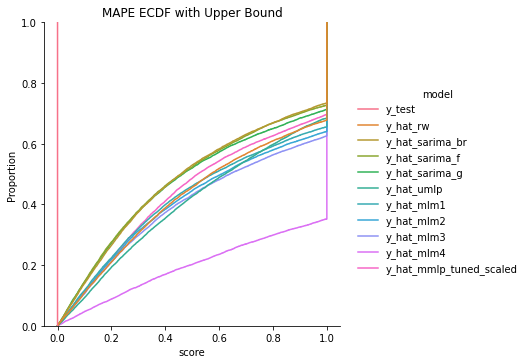

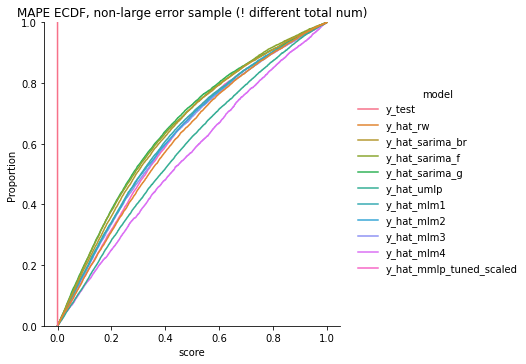

In [28]:
# upper bound
error_melt_ub = error_p_abs_ub.reset_index().melt(id_vars=error_p_abs.index.names, var_name="model", value_name="score")
plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt_ub, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=error_melt_ub, x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF with Upper Bound")
sns.displot(data=error_melt_ub[error_melt_ub["score"] < 1], x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF, non-large error sample (! different total num)")

# 予測精度が高い(MAPE 0<= ~ <1)サンプル

In [29]:
error_p_abs[(error_p_abs <= 1)].describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,13068.0,8859.000000,9599.000000,9503.000000,9325.000000,8946.000000,8578.000000,8376.000000,8185.000000,4600.000000,9113.000000
mean,0.0,0.386897,0.356041,0.349211,0.347040,0.420119,0.368603,0.371302,0.376446,0.447113,0.378849
std,0.0,0.269149,0.266380,0.265671,0.267420,0.277674,0.269736,0.270011,0.272606,0.285777,0.267688
min,0.0,0.000000,0.000127,0.000035,0.000039,0.000044,0.000121,0.000355,0.000041,0.000266,0.000018
25%,0.0,0.159447,0.133796,0.126086,0.126160,0.176783,0.140751,0.143960,0.145080,0.200188,0.156975
50%,0.0,0.338758,0.291790,0.283854,0.278385,0.382438,0.309212,0.311205,0.320008,0.417024,0.326847
75%,0.0,0.584240,0.536545,0.535589,0.525443,0.646559,0.559272,0.566103,0.573731,0.679458,0.559935
max,0.0,0.999674,0.999918,0.999912,0.999312,0.999467,0.999653,0.999826,0.999807,0.999241,0.999989


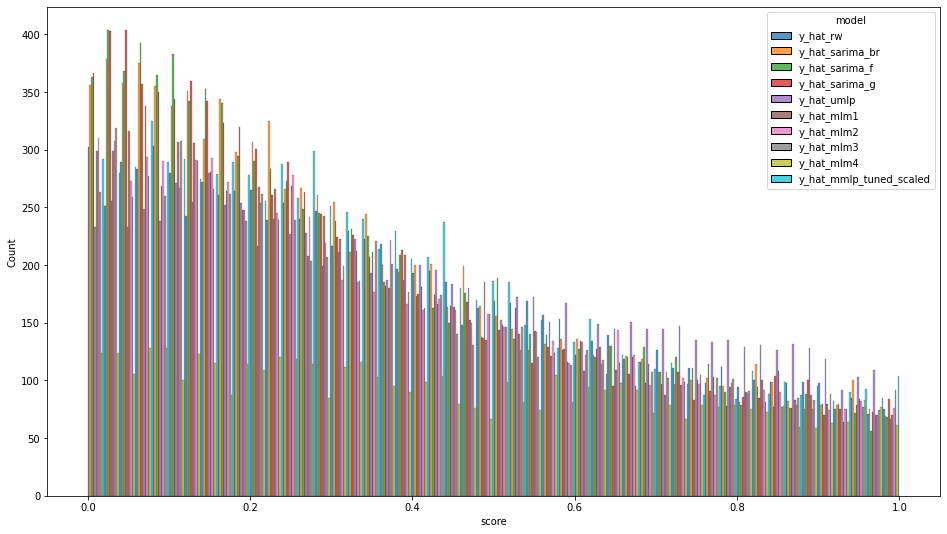

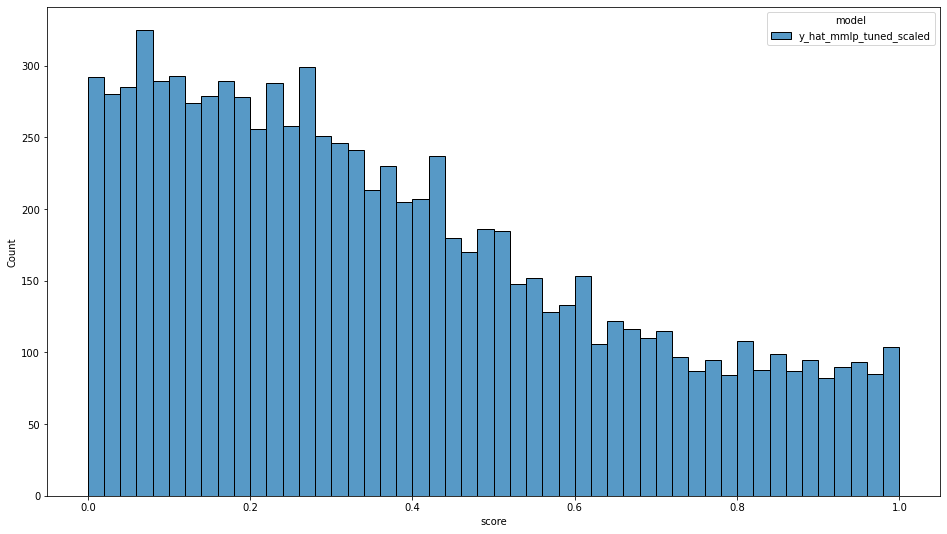

In [30]:
plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt[(error_melt["model"] != "y_test") & (error_melt["score"] <= 1)], 
             x="score", hue="model", bins=50, multiple="dodge")
plt.show()

plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt[(error_melt["model"] == "y_hat_mmlp_tuned_scaled") & (error_melt["score"] <= 1)], 
             x="score", hue="model", bins=50, multiple="dodge")
plt.show()

下手な予測はおお外しなほど少ない

企業集計

In [31]:
ai["y_hat_mmlp_tuned_scaled"][ai["y_hat_mmlp_tuned_scaled"] <= 1.0]

あらた     MAPE    0.280263
いすゞ自動車  MAPE    0.838838
かどや製油   MAPE    0.833886
きんでん    MAPE    0.232925
たけびし    MAPE    0.329654
                  ...   
ＴＤＣソフト  MAPE    0.355411
ＴＤＫ     MAPE    0.488436
ＴＩＳ     MAPE    0.471742
ＴＯＷＡ    MAPE    0.931482
ＴＹＫ     MAPE    0.579547
Name: y_hat_mmlp_tuned_scaled, Length: 491, dtype: float64

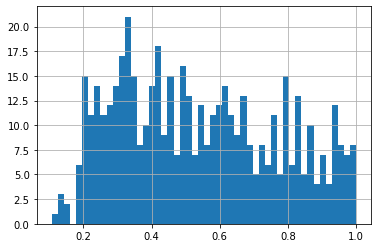

In [32]:
ai["y_hat_mmlp_tuned_scaled"][ai["y_hat_mmlp_tuned_scaled"] <= 1.0].hist(bins=50)

# 予測精度が低い(MAPE > 1)large errorサンプル

In [33]:
error_p_abs[(error_p_abs > 1)].describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,0.0,4209.000000,3469.000000,3565.000000,3743.000000,4122.000000,4490.000000,4692.000000,4883.000000,8468.000000,3955.000000
mean,NaN,12.579523,35.586770,9.417307,20.513912,46.030197,16.114990,39.123383,40.073381,49.054079,11.806426
std,NaN,146.921482,1511.798052,64.040058,570.970177,2100.406425,292.882631,1764.845979,1794.252720,888.571873,102.763741
min,NaN,1.000649,1.000191,1.000575,1.000162,1.000327,1.000245,1.000038,1.000225,1.000156,1.000065
25%,NaN,1.366242,1.338613,1.350867,1.384281,1.355641,1.441451,1.463913,1.486265,1.945654,1.376352
50%,NaN,2.223711,2.100234,2.072554,2.241290,2.116065,2.409201,2.543043,2.610658,4.030561,2.153474
75%,NaN,4.777409,4.370897,4.158418,5.024806,5.027772,5.377907,5.987673,6.324614,11.362289,4.610143
max,NaN,5895.000000,88978.127205,2068.166620,34626.006762,134665.300000,19193.225310,120789.437098,125258.155053,50075.354129,3937.530700


In [34]:
error_p_abs[(error_p_abs > 10)].describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
count,0.0,496.000000,402.000000,366.000000,514.000000,579.000000,661.000000,756.000000,806.000000,2328.000000,477.000000
mean,NaN,86.307581,286.984701,68.919116,132.364993,311.364690,93.088179,227.735976,227.881189,169.325879,78.505248
std,NaN,421.067602,4437.844815,189.890299,1537.352568,5601.100703,759.245459,4394.290889,4413.807292,1689.056848,287.447402
min,NaN,10.005525,10.015327,10.011346,10.023679,10.008072,10.030004,10.031020,10.007022,10.005112,10.086393
25%,NaN,13.052132,13.803201,13.622536,14.330035,14.629793,13.532212,13.305241,13.704568,14.657615,13.934881
50%,NaN,19.908918,21.420967,21.064691,21.557933,23.193801,20.955867,20.825039,21.762405,24.227069,21.203566
75%,NaN,40.593206,47.798518,46.614518,45.795561,43.130770,47.334617,49.205914,49.756153,52.741496,44.758244
max,NaN,5895.000000,88978.127205,2068.166620,34626.006762,134665.300000,19193.225310,120789.437098,125258.155053,50075.354129,3937.530700


(4209 - 496)/4209のlarge error sampleは 1000%以内(それでも激下手)

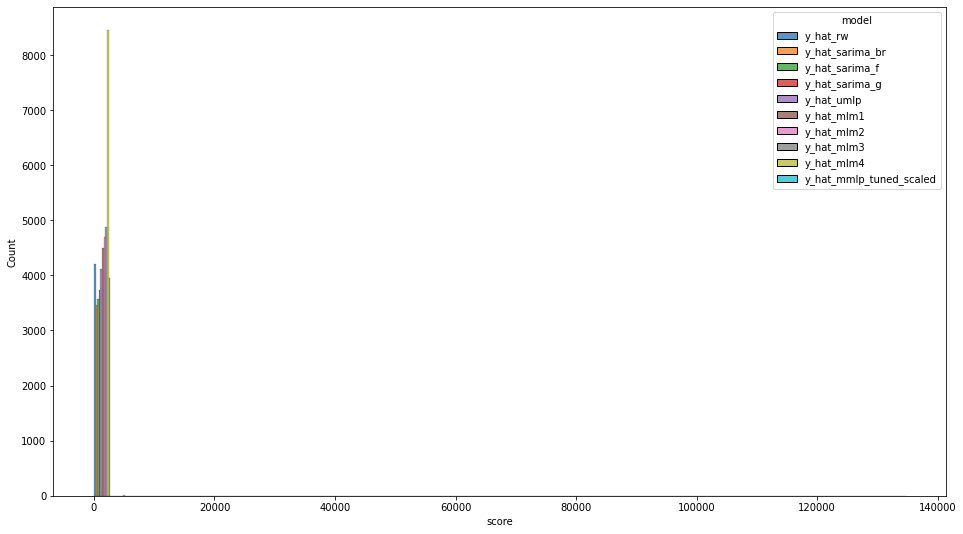

In [35]:
plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt[(error_melt["model"] != "y_test") & (error_melt["score"] > 1)], 
             x="score", hue="model", bins=50, multiple="dodge")

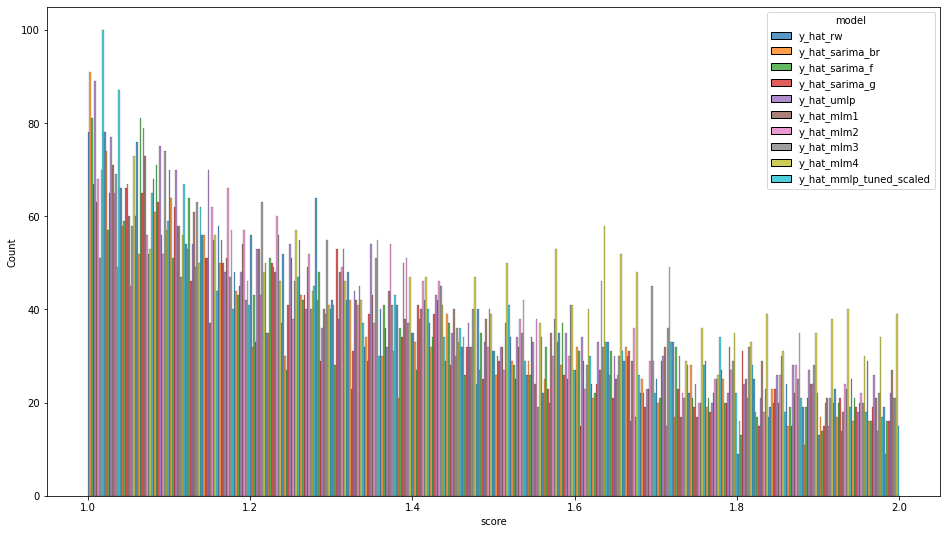

In [36]:
plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt[(error_melt["model"] != "y_test") & (error_melt["score"] > 1) & (error_melt["score"] <= 2)], 
             x="score", hue="model", bins=50, multiple="dodge")

large errorも、1周辺が一番多く、errorが大きくなるにつれて次第に減っている。

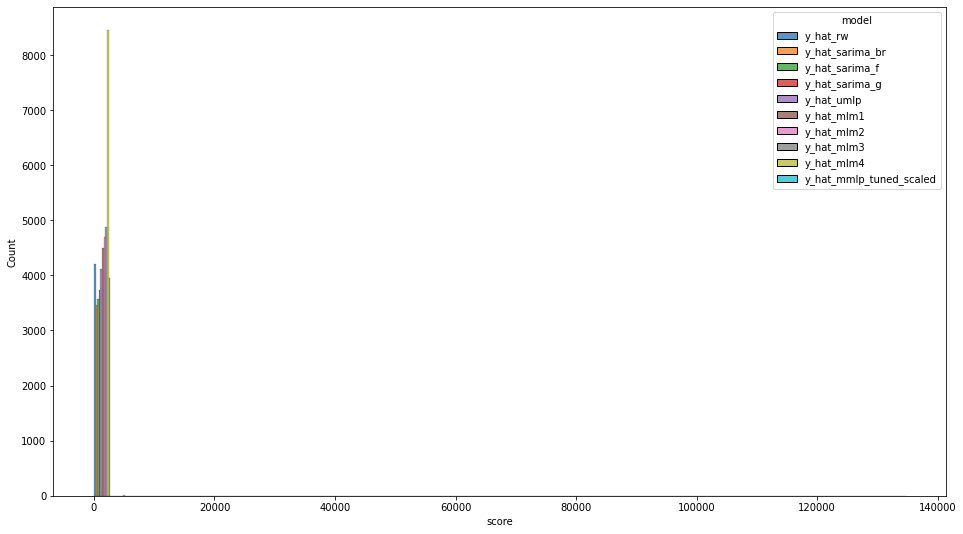

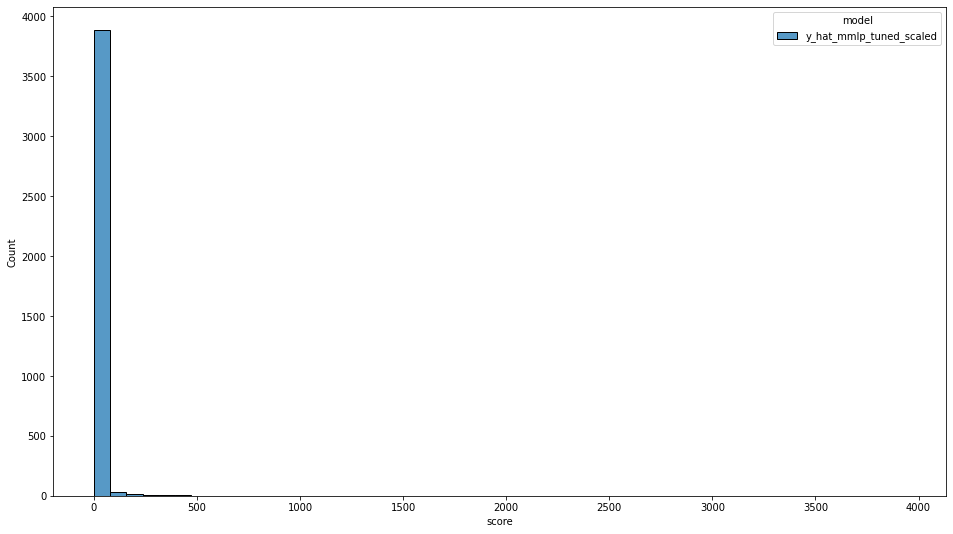

In [37]:
plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt[(error_melt["model"] != "y_test") & (error_melt["score"] > 1)], 
             x="score", hue="model", bins=50, multiple="dodge")
plt.show()

plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt[(error_melt["model"] == "y_hat_mmlp_tuned_scaled") & (error_melt["score"] > 1)], 
             x="score", hue="model", bins=50, multiple="dodge")
plt.show()

In [38]:
mmlp_laege_error_idx = error_p_abs["y_hat_mmlp_tuned_scaled"][error_p_abs["y_hat_mmlp_tuned_scaled"] > 1].index

In [39]:
mmlp_laege_error_idx.get_level_values(0).unique()

Index(['いすゞ自動車', 'いなげや', 'かどや製油', 'さくらインターネット', 'なとり', 'はせがわ', 'はるやまホールディングス',
       'ぴあ', 'やまや', 'りらいあコミュニケーションズ',
       ...
       'ＴＯＴＯ', 'ＴＯＷＡ', 'ＴＰＲ', 'ＴＹＫ', 'ＵＡＣＪ', 'ＶＴホールディングス', 'ＷＤＢホールディングス',
       'ＷＯＷＯＷ', 'ＺＯＺＯ', 'ｅＢＡＳＥ'],
      dtype='object', name='企業名', length=949)

949 / 1089 社 にlarge errorがある。

In [40]:
ai["y_hat_mmlp_tuned_scaled"][ai["y_hat_mmlp_tuned_scaled"] > 1].index.get_level_values(0).unique()

Index(['いなげや', 'さくらインターネット', 'はせがわ', 'ぴあ', 'やまや', 'りらいあコミュニケーションズ', 'わかもと製薬',
       'アイダエンジニアリング', 'アイネス', 'アイロムグループ',
       ...
       'ＴＢＳホールディングス', 'ＴＯＡ', 'ＴＯＴＯ', 'ＴＰＲ', 'ＵＡＣＪ', 'ＶＴホールディングス',
       'ＷＤＢホールディングス', 'ＷＯＷＯＷ', 'ＺＯＺＯ', 'ｅＢＡＳＥ'],
      dtype='object', length=598)

企業ごと集計すると MAPEが1以上の企業は 598 / 1089

# 四半期ごとに集計してみる

In [41]:
error_p_abs.groupby(level="四半期").describe().T.loc[pd.IndexSlice[:, "mean"], :]

,四半期,Q1,Q2,Q3,Q4
y_test,mean,0.000000,0.000000,0.000000,0.000000
y_hat_rw,mean,8.712404,1.744397,3.499674,3.299337
y_hat_sarima_br,mean,30.484859,2.012035,2.971535,3.364795
y_hat_sarima_f,mean,3.553453,1.637375,2.362596,3.738664
y_hat_sarima_g,mean,14.540558,2.161961,3.763065,4.027748
y_hat_umlp,mean,46.240784,2.876818,3.429406,6.680068
y_hat_mlm1,mean,10.932709,3.817958,3.816147,4.548638
y_hat_mlm2,mean,42.729891,3.105748,5.486882,5.817649
y_hat_mlm3,mean,43.906715,4.503295,5.794339,6.634197
y_hat_mlm4,mean,38.397534,44.973482,26.489716,17.916024


In [42]:
error_p_abs_ub.groupby(level="四半期").describe().T.loc[pd.IndexSlice[:, "mean"], :]

,四半期,Q1,Q2,Q3,Q4
y_test,mean,0.000000,0.000000,0.000000,0.000000
y_hat_rw,mean,0.671053,0.535566,0.506073,0.624781
y_hat_sarima_br,mean,0.565974,0.490839,0.478214,0.572913
y_hat_sarima_f,mean,0.555795,0.487934,0.482992,0.580274
y_hat_sarima_g,mean,0.573896,0.488425,0.497580,0.576354
y_hat_umlp,mean,0.630514,0.586978,0.562507,0.632117
y_hat_mlm1,mean,0.630360,0.563338,0.537567,0.610907
y_hat_mlm2,mean,0.619795,0.558540,0.576175,0.633621
y_hat_mlm3,mean,0.628748,0.580399,0.586184,0.642445
y_hat_mlm4,mean,0.822945,0.802717,0.795125,0.800737


Q1, Q4が下手

# 年ごとに集計

In [61]:
error_p_abs.groupby(level="会計年度").describe().T.loc[pd.IndexSlice[:, "mean"], :]

,会計年度,2018,2019,2020
y_test,mean,0.000000,0.000000,0.000000
y_hat_rw,mean,2.209690,4.847356,5.884813
y_hat_sarima_br,mean,2.569134,23.156252,3.399532
y_hat_sarima_f,mean,1.940328,3.253262,3.275477
y_hat_sarima_g,mean,3.044571,11.227660,4.097768
y_hat_umlp,mean,4.322865,35.074407,5.023034
y_hat_mlm1,mean,3.855230,8.388885,5.092475
y_hat_mlm2,mean,5.318427,32.143292,5.393408
y_hat_mlm3,mean,6.306176,33.845150,5.477585
y_hat_mlm4,mean,26.402939,29.752996,39.676632


In [62]:
error_p_abs_ub.groupby(level="会計年度").describe().T.loc[pd.IndexSlice[:, "mean"], :]

,会計年度,2018,2019,2020
y_test,mean,0.000000,0.000000,0.000000
y_hat_rw,mean,0.553127,0.582340,0.617638
y_hat_sarima_br,mean,0.488289,0.516825,0.575840
y_hat_sarima_f,mean,0.477643,0.521906,0.580697
y_hat_sarima_g,mean,0.487701,0.525265,0.589225
y_hat_umlp,mean,0.575970,0.595283,0.637834
y_hat_mlm1,mean,0.548563,0.583415,0.624651
y_hat_mlm2,mean,0.560426,0.591948,0.638724
y_hat_mlm3,mean,0.573951,0.604718,0.649663
y_hat_mlm4,mean,0.787379,0.800530,0.828234


# large error の原因を元データから探る

In [43]:
mmlp_laege_error_firm = mmlp_laege_error_idx.get_level_values(0).unique()

In [44]:
tse1.describe()

,決算期（年）,決算期（月）,連結基準フラグ,決算種別フラグ,１株当たり利益［３ヵ月］,１株当たり利益［累計］,当期純利益（連結）［累計］,【ＱＴＲ】当期利益,棚卸資産,受取手形・売掛金／売掛金及びその他の短期債権,...,期中平均株式数［累計］,期中平均株式数［３ヵ月］,期末発行済株式総数,自己株式数,当期純利益（連結）［３ヵ月］,売上総利益［３ヵ月］,販売費及び一般管理費［３ヵ月］,法人税等［３ヵ月］,税金等調整前当期純利益［３ヵ月］,売上高・営業収益［３ヵ月］
count,57772.000000,57772.000000,57772.000000,57772.000000,57772.000000,57123.000000,4.688500e+04,5.761300e+04,5.777200e+04,5.777200e+04,...,5.714200e+04,5.777200e+04,5.775500e+04,5.643400e+04,5.777200e+04,5.777200e+04,5.777200e+04,5.777200e+04,5.777200e+04,5.777200e+04
mean,2014.250000,7.500000,1.036488,18.999325,66.177576,157.168063,9.717671e+09,2.920130e+09,4.582776e+10,6.182541e+10,...,1.588732e+08,1.604495e+08,1.648132e+08,4.879578e+06,3.141232e+09,2.033857e+10,1.466088e+10,1.609796e+09,4.668078e+09,8.818853e+10
std,3.766662,3.354131,0.431070,5.244411,683.800952,1507.594173,6.497047e+10,2.562205e+10,1.437586e+11,1.898491e+11,...,4.241573e+08,4.474589e+08,4.434046e+08,2.107912e+07,2.675992e+10,6.949900e+10,4.512451e+10,1.062485e+10,3.033569e+10,2.893475e+11
min,2008.000000,3.000000,0.000000,10.000000,-37300.500000,-53293.940000,-1.160201e+12,-1.438163e+12,1.000000e+06,1.000000e+06,...,1.359900e+04,-1.602330e+10,1.400000e+04,1.000000e+00,-1.457220e+12,-4.097360e+11,-1.889590e+11,-8.230590e+11,-1.392627e+12,-1.074904e+12
25%,2011.000000,5.250000,1.000000,10.000000,3.140000,7.020000,3.740000e+08,1.100000e+08,2.976000e+09,6.182750e+09,...,2.007487e+07,2.005777e+07,2.124483e+07,1.901978e+05,1.157500e+08,1.882000e+09,1.420000e+09,8.300000e+07,2.120000e+08,8.562750e+09
50%,2014.000000,7.500000,1.000000,21.000000,14.660000,29.770000,1.532000e+09,5.620000e+08,9.210000e+09,1.710300e+10,...,4.458701e+07,4.464376e+07,4.678380e+07,1.050571e+06,5.800000e+08,4.430000e+09,3.304500e+09,3.220000e+08,9.060000e+08,2.166500e+10
75%,2017.250000,9.750000,1.000000,22.000000,36.830000,81.515000,5.238000e+09,1.917000e+09,2.896725e+10,4.588150e+10,...,1.169000e+08,1.175955e+08,1.205429e+08,3.631106e+06,1.989250e+09,1.368425e+10,1.007925e+10,1.075000e+09,3.020000e+09,6.155275e+10
max,2021.000000,12.000000,3.000000,23.000000,31202.830000,67990.310000,5.078236e+12,1.932800e+12,2.888028e+12,9.714931e+12,...,9.128219e+09,1.327322e+10,9.503214e+09,5.173905e+08,1.981541e+12,2.004790e+12,8.779390e+11,7.037010e+11,2.308952e+12,8.150032e+12


In [45]:
tse1.drop(mmlp_laege_error_firm).describe().round(2)

,決算期（年）,決算期（月）,連結基準フラグ,決算種別フラグ,１株当たり利益［３ヵ月］,１株当たり利益［累計］,当期純利益（連結）［累計］,【ＱＴＲ】当期利益,棚卸資産,受取手形・売掛金／売掛金及びその他の短期債権,...,期中平均株式数［累計］,期中平均株式数［３ヵ月］,期末発行済株式総数,自己株式数,当期純利益（連結）［３ヵ月］,売上総利益［３ヵ月］,販売費及び一般管理費［３ヵ月］,法人税等［３ヵ月］,税金等調整前当期純利益［３ヵ月］,売上高・営業収益［３ヵ月］
count,8424.00,8424.00,8424.00,8424.00,8424.00,8346.00,6.692000e+03,8.398000e+03,8.424000e+03,8.424000e+03,...,8.350000e+03,8.424000e+03,8.417000e+03,8.298000e+03,8.424000e+03,8.424000e+03,8.424000e+03,8.424000e+03,8.424000e+03,8.424000e+03
mean,2014.25,7.50,1.02,19.00,45.35,107.64,1.465484e+10,4.638090e+09,3.572731e+10,6.594828e+10,...,1.170600e+08,1.177574e+08,1.205839e+08,3.367389e+06,4.824086e+09,1.780105e+10,1.149317e+10,2.035376e+09,6.712204e+09,7.613082e+10
std,3.77,3.35,0.46,5.25,205.85,486.11,9.730646e+10,4.150508e+10,8.792678e+10,1.661386e+11,...,2.192826e+08,2.256507e+08,2.224840e+08,8.032420e+06,4.284023e+10,5.794040e+10,3.946764e+10,1.868011e+10,4.862783e+10,1.699541e+11
min,2008.00,3.00,0.00,10.00,-1369.64,-722.17,-8.007600e+11,-1.438163e+12,1.000000e+06,1.400000e+07,...,3.134980e+05,2.484610e+05,3.295580e+05,3.000000e+01,-1.457220e+12,-4.097360e+11,-1.251000e+11,-8.230590e+11,-1.392627e+12,-1.074904e+12
25%,2011.00,5.25,1.00,10.00,7.82,14.34,7.430000e+08,2.330000e+08,1.985500e+09,8.268000e+09,...,1.979464e+07,1.974238e+07,2.070000e+07,1.839322e+05,2.360000e+08,1.972750e+09,1.236750e+09,1.390000e+08,3.940000e+08,8.502500e+09
50%,2014.00,7.50,1.00,21.00,21.54,42.63,2.433000e+09,8.540000e+08,7.743000e+09,2.051600e+10,...,4.305289e+07,4.317040e+07,4.596380e+07,1.203232e+06,8.770000e+08,4.651000e+09,3.052000e+09,4.875000e+08,1.373500e+09,2.301500e+10
75%,2017.25,9.75,1.00,22.00,44.31,104.48,7.281500e+09,2.627500e+09,2.675275e+10,5.475275e+10,...,1.060134e+08,1.060167e+08,1.117767e+08,3.602133e+06,2.704000e+09,1.468000e+10,9.841000e+09,1.447000e+09,4.190000e+09,7.492225e+10
max,2021.00,12.00,3.00,23.00,7725.65,18551.22,5.078236e+12,1.932800e+12,1.203786e+12,2.646387e+12,...,2.083066e+09,5.069580e+09,2.089814e+09,3.512976e+08,1.981541e+12,1.004785e+12,7.255810e+11,7.037010e+11,2.308952e+12,2.514599e+12


In [46]:
tse1.loc[mmlp_laege_error_firm].describe().round(2)

,決算期（年）,決算期（月）,連結基準フラグ,決算種別フラグ,１株当たり利益［３ヵ月］,１株当たり利益［累計］,当期純利益（連結）［累計］,【ＱＴＲ】当期利益,棚卸資産,受取手形・売掛金／売掛金及びその他の短期債権,...,期中平均株式数［累計］,期中平均株式数［３ヵ月］,期末発行済株式総数,自己株式数,当期純利益（連結）［３ヵ月］,売上総利益［３ヵ月］,販売費及び一般管理費［３ヵ月］,法人税等［３ヵ月］,税金等調整前当期純利益［３ヵ月］,売上高・営業収益［３ヵ月］
count,49348.00,49348.00,49348.00,49348.00,49348.00,48777.00,4.019300e+04,4.921500e+04,4.934800e+04,4.934800e+04,...,4.879200e+04,4.934800e+04,4.933800e+04,4.813600e+04,4.934800e+04,4.934800e+04,4.934800e+04,4.934800e+04,4.934800e+04,4.934800e+04
mean,2014.25,7.50,1.04,19.00,69.73,165.64,8.895648e+09,2.626979e+09,4.755196e+10,6.112161e+10,...,1.660289e+08,1.677373e+08,1.723587e+08,5.140259e+06,2.853958e+09,2.077174e+10,1.520163e+10,1.537146e+09,4.319133e+09,9.024685e+10
std,3.77,3.35,0.43,5.24,734.90,1618.90,5.781842e+10,2.177152e+10,1.511770e+11,1.935994e+11,...,4.495778e+08,4.747034e+08,4.704413e+08,2.256865e+07,2.290213e+10,7.127658e+10,4.599931e+10,8.518266e+09,2.594017e+10,3.050489e+11
min,2008.00,3.00,0.00,10.00,-37300.50,-53293.94,-1.160201e+12,-7.657650e+11,1.000000e+06,1.000000e+06,...,1.359900e+04,-1.602330e+10,1.400000e+04,1.000000e+00,-7.657650e+11,-1.320170e+11,-1.889590e+11,-2.428710e+11,-9.147290e+11,5.700000e+07
25%,2011.00,5.25,1.00,18.25,2.55,5.99,3.270000e+08,9.100000e+07,3.146750e+09,5.862000e+09,...,2.011838e+07,2.007549e+07,2.137900e+07,1.907475e+05,9.600000e+07,1.870750e+09,1.443750e+09,7.600000e+07,1.880000e+08,8.569000e+09
50%,2014.00,7.50,1.00,21.50,13.50,27.74,1.407000e+09,5.200000e+08,9.458000e+09,1.649100e+10,...,4.473810e+07,4.486606e+07,4.682653e+07,1.028327e+06,5.390000e+08,4.407000e+09,3.341000e+09,2.980000e+08,8.370000e+08,2.139750e+10
75%,2017.25,9.75,1.00,22.25,35.37,77.49,4.890000e+09,1.798000e+09,2.936650e+10,4.435975e+10,...,1.204156e+08,1.209679e+08,1.254903e+08,3.643582e+06,1.871000e+09,1.344325e+10,1.012425e+10,1.021000e+09,2.849250e+09,6.017575e+10
max,2021.00,12.00,3.00,23.00,31202.83,67990.31,2.586106e+12,1.016728e+12,2.888028e+12,9.714931e+12,...,9.128219e+09,1.327322e+10,9.503214e+09,5.173905e+08,1.023010e+12,2.004790e+12,8.779390e+11,3.839680e+11,1.141174e+12,8.150032e+12


In [132]:
variable_mean = pd.concat([ai.unstack(level=1), tse1.groupby(level=0).mean().loc[ai.index.get_level_values(0)]], axis=1)
variable_mean.describe()

,"(y_test, MAPE)","(y_hat_rw, MAPE)","(y_hat_sarima_br, MAPE)","(y_hat_sarima_f, MAPE)","(y_hat_sarima_g, MAPE)","(y_hat_umlp, MAPE)","(y_hat_mlm1, MAPE)","(y_hat_mlm2, MAPE)","(y_hat_mlm3, MAPE)","(y_hat_mlm4, MAPE)",...,期中平均株式数［累計］,期中平均株式数［３ヵ月］,期末発行済株式総数,自己株式数,当期純利益（連結）［３ヵ月］,売上総利益［３ヵ月］,販売費及び一般管理費［３ヵ月］,法人税等［３ヵ月］,税金等調整前当期純利益［３ヵ月］,売上高・営業収益［３ヵ月］
count,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,...,1.089000e+03,1.089000e+03,1.089000e+03,1.088000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,...,1.601669e+08,1.615294e+08,1.659215e+08,4.928097e+06,2.975484e+09,2.005651e+10,1.446514e+10,1.571423e+09,4.484779e+09,8.800736e+10
std,0.0,24.340679,225.215044,10.140076,88.594166,342.113625,50.936578,305.926501,317.366629,234.626426,...,3.835162e+08,3.900200e+08,4.005007e+08,1.912548e+07,1.346134e+10,6.419102e+10,4.258812e+10,5.344074e+09,1.724854e+10,2.824692e+11
min,0.0,0.108712,0.049801,0.079664,0.071814,0.108270,0.051167,0.094949,0.090533,0.185546,...,3.205138e+06,3.152101e+06,3.376154e+06,1.068462e+02,-2.514696e+10,1.505769e+07,1.258269e+08,-1.528462e+08,-1.903254e+10,7.132692e+08
25%,0.0,0.633784,0.468086,0.496089,0.507989,0.586712,0.629979,0.663215,0.677769,1.664993,...,2.375587e+07,2.377483e+07,2.488325e+07,4.139304e+05,2.297885e+08,2.079788e+09,1.511750e+09,1.566923e+08,3.801923e+08,9.058558e+09
50%,0.0,1.307412,0.978257,0.994169,1.056402,1.064089,1.286960,1.464974,1.552599,4.958196,...,4.949532e+07,4.983223e+07,5.218243e+07,1.365880e+06,6.455577e+08,4.639192e+09,3.382154e+09,3.906538e+08,1.050673e+09,2.282200e+10
75%,0.0,2.604576,1.865236,1.934714,2.136072,2.290723,2.953894,3.314285,3.480510,13.595323,...,1.204929e+08,1.210413e+08,1.273574e+08,3.994332e+06,1.953212e+09,1.403004e+10,1.019877e+10,1.208115e+09,3.196923e+09,6.224638e+10
max,0.0,492.518013,7428.137986,172.733304,2896.696746,11262.841325,1627.680038,10088.018752,10460.852271,5240.955894,...,4.508285e+09,4.768253e+09,4.951371e+09,3.407162e+08,3.714564e+11,1.245033e+12,6.392854e+11,1.312998e+11,4.475616e+11,6.244907e+12


MAPE vs mean of １株当たり利益［３ヵ月］


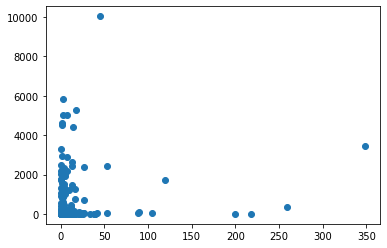

MAPE vs mean of １株当たり利益［累計］


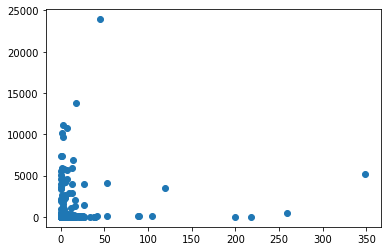

MAPE vs mean of 当期純利益（連結）［累計］


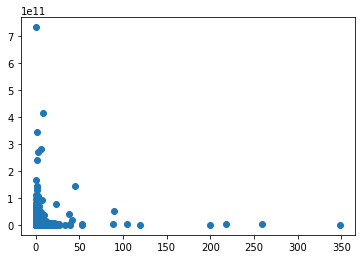

MAPE vs mean of 【ＱＴＲ】当期利益


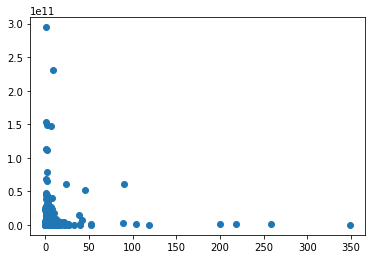

MAPE vs mean of 棚卸資産


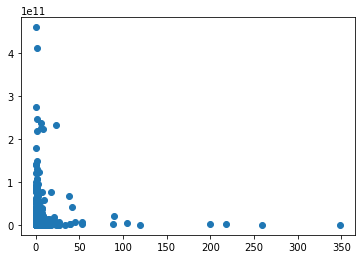

MAPE vs mean of 受取手形・売掛金／売掛金及びその他の短期債権


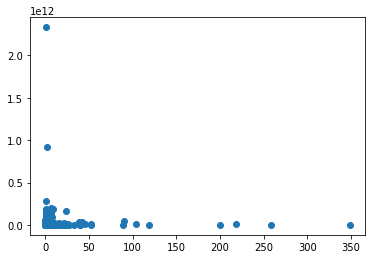

MAPE vs mean of 資本的支出


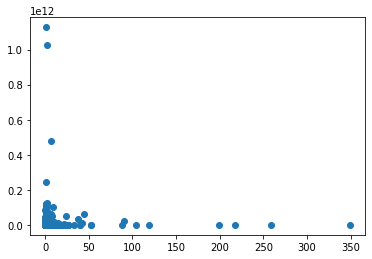

MAPE vs mean of 売上総利益［累計］


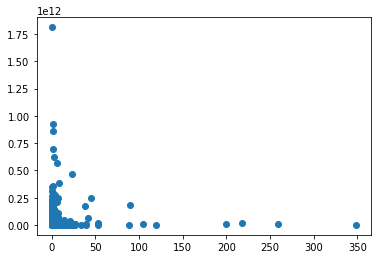

MAPE vs mean of 【ＱＴＲ】売上総利益


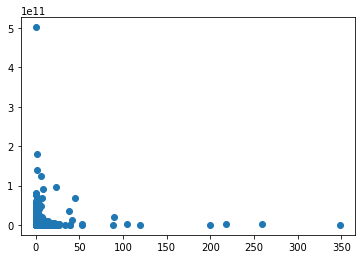

MAPE vs mean of 販売費及び一般管理費［累計］


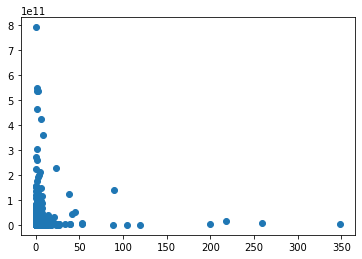

MAPE vs mean of 法人税等［累計］


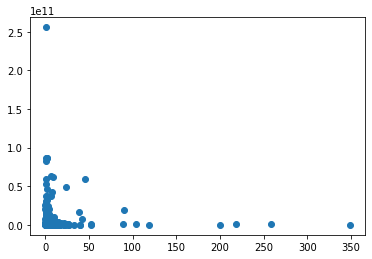

MAPE vs mean of 法人税・住民税及び事業税合計／当期税金費用［累計］


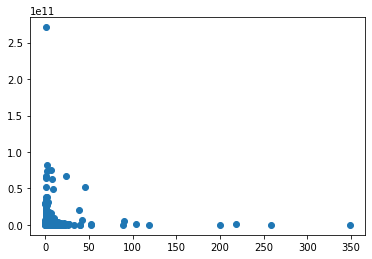

MAPE vs mean of 税金等調整前当期純利益［累計］


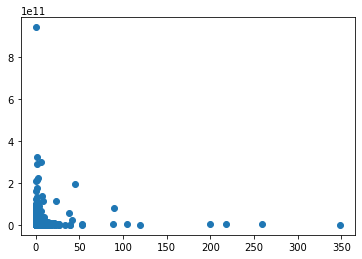

MAPE vs mean of 税金等調整前当期利益［累計］


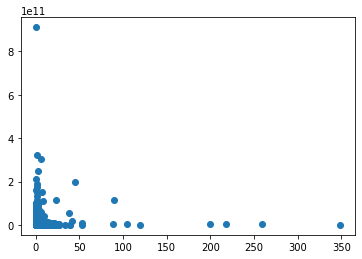

MAPE vs mean of 【ＱＴＲ】税金等調整前当期利益


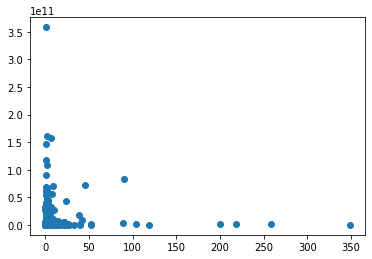

MAPE vs mean of １株当たり税引前利益


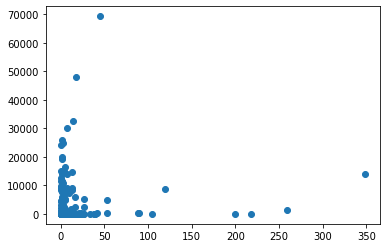

MAPE vs mean of 売上高・営業収益［累計］


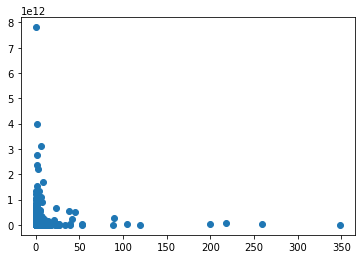

MAPE vs mean of 【ＱＴＲ】売上高・営業収益


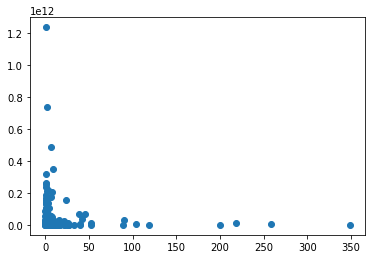

MAPE vs mean of １株当たり売上高


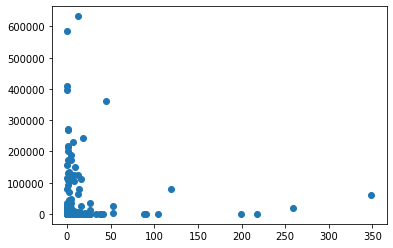

MAPE vs mean of 期末従業員数


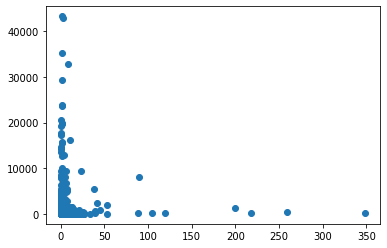

MAPE vs mean of 純資産合計／資本合計


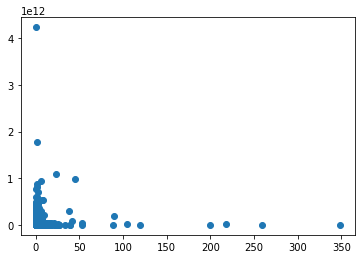

MAPE vs mean of 【ＱＴＲ】純資産


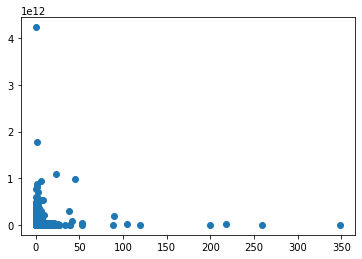

MAPE vs mean of １株当たり純資産


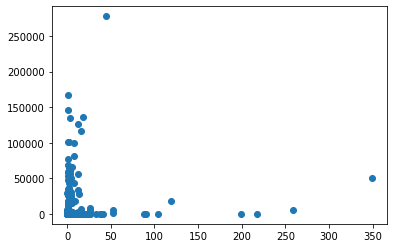

MAPE vs mean of 期中平均株式数［累計］


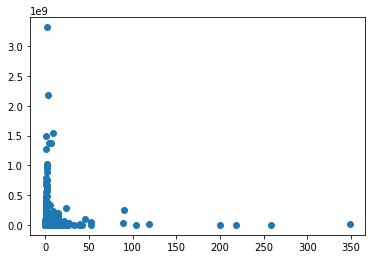

MAPE vs mean of 期中平均株式数［３ヵ月］


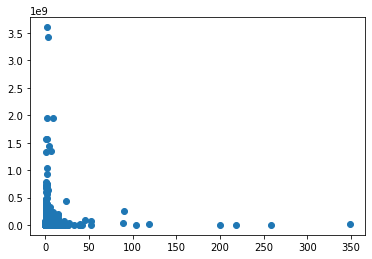

MAPE vs mean of 期末発行済株式総数


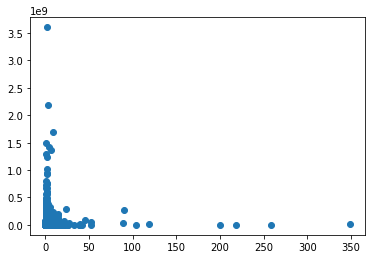

MAPE vs mean of 自己株式数


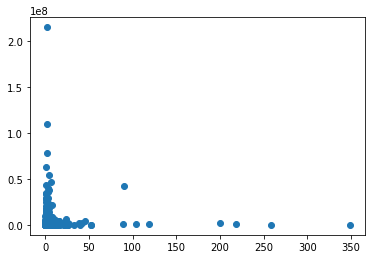

MAPE vs mean of 当期純利益（連結）［３ヵ月］


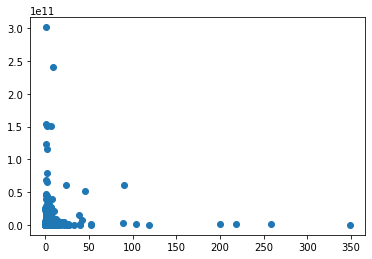

MAPE vs mean of 売上総利益［３ヵ月］


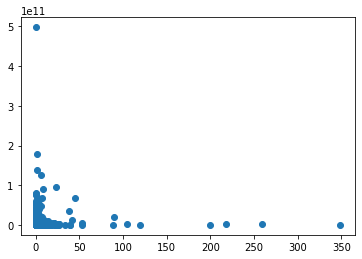

MAPE vs mean of 販売費及び一般管理費［３ヵ月］


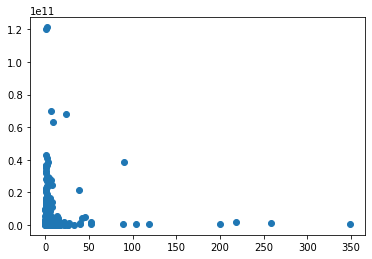

MAPE vs mean of 法人税等［３ヵ月］


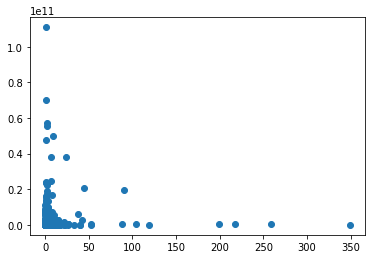

MAPE vs mean of 税金等調整前当期純利益［３ヵ月］


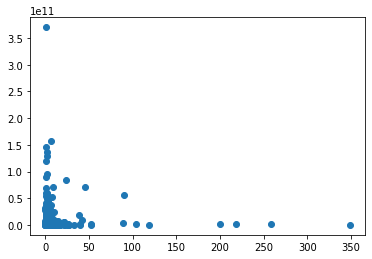

MAPE vs mean of 売上高・営業収益［３ヵ月］


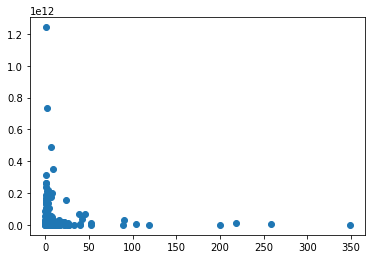

In [133]:
for i in variable_std.columns[15:]:
    print("MAPE vs mean of", i)
    plt.scatter(x = variable_mean[('y_hat_mmlp_tuned_scaled', 'MAPE')], y=variable_std[i])
    plt.show()

In [134]:
df_mean = pd.concat([ai.unstack(level=1), df.groupby(level=0).mean().loc[ai.index.get_level_values(0)]], axis=1)
df_mean.describe()

,"(y_test, MAPE)","(y_hat_rw, MAPE)","(y_hat_sarima_br, MAPE)","(y_hat_sarima_f, MAPE)","(y_hat_sarima_g, MAPE)","(y_hat_umlp, MAPE)","(y_hat_mlm1, MAPE)","(y_hat_mlm2, MAPE)","(y_hat_mlm3, MAPE)","(y_hat_mlm4, MAPE)","(y_hat_mmlp_tuned_scaled, MAPE)",EPS,INV,AR,CAPX,GM,SA,ETR,LF
count,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,3.837378,67.219409,781.733070,1273.860397,173.230231,508.658812,381.614042,0.346242,16.185539
std,0.0,24.340679,225.215044,10.140076,88.594166,342.113625,50.936578,305.926501,317.366629,234.626426,17.536818,299.343582,3925.037139,4737.964364,1116.646265,2001.023239,1541.050046,0.939656,0.752702
min,0.0,0.108712,0.049801,0.079664,0.071814,0.108270,0.051167,0.094949,0.090533,0.185546,0.107655,-941.551184,0.396743,-4.535203,-2.591127,-253.254287,-3.586075,-6.345197,13.521219
25%,0.0,0.633784,0.468086,0.496089,0.507989,0.586712,0.629979,0.663215,0.677769,1.664993,0.560870,9.869494,135.913387,259.295975,20.685873,82.518320,57.423113,0.218560,15.667661
50%,0.0,1.307412,0.978257,0.994169,1.056402,1.064089,1.286960,1.464974,1.552599,4.958196,1.144925,18.781731,259.746613,463.748117,40.208789,137.315839,100.177485,0.337867,16.140058
75%,0.0,2.604576,1.865236,1.934714,2.136072,2.290723,2.953894,3.314285,3.480510,13.595323,2.279961,33.723377,471.353463,836.085809,77.943414,223.766480,173.455759,0.398574,16.647393
max,0.0,492.518013,7428.137986,172.733304,2896.696746,11262.841325,1627.680038,10088.018752,10460.852271,5240.955894,348.793877,6061.806787,72367.869708,79526.961761,26019.377319,26987.115318,24388.044486,17.305120,19.614425


MAPE vs mean of EPS


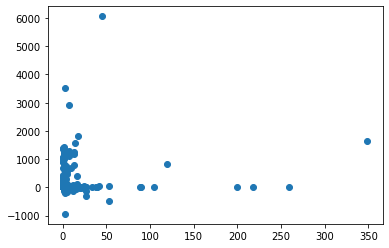

MAPE vs mean of INV


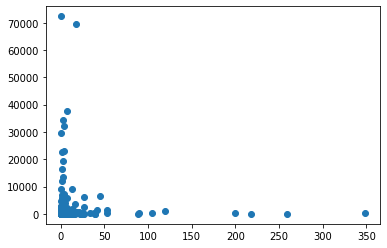

MAPE vs mean of AR


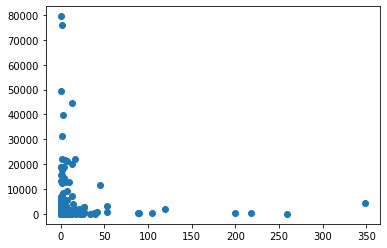

MAPE vs mean of CAPX


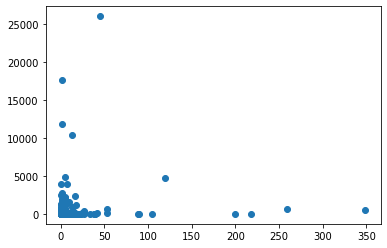

MAPE vs mean of GM


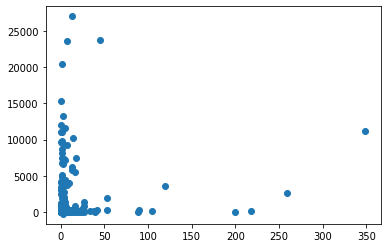

MAPE vs mean of SA


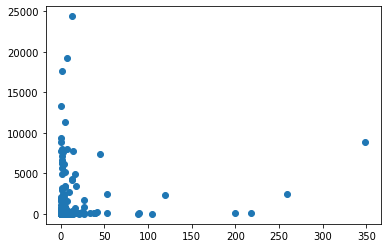

MAPE vs mean of ETR


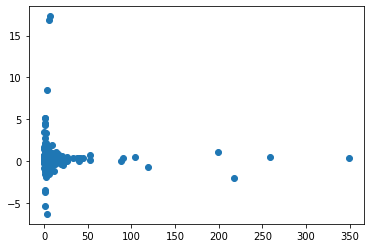

MAPE vs mean of LF


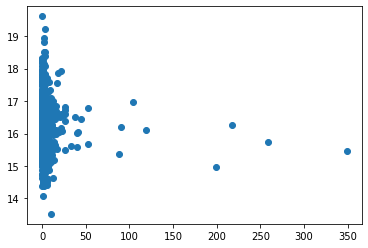

In [135]:
for i in df_mean.columns[11:]:
    print("MAPE vs mean of", i)
    plt.scatter(x = df_mean[('y_hat_mmlp_tuned_scaled', 'MAPE')], y=df_mean[i])
    plt.show()

元データは見づらい。MAPEが大きい原因が企業ごとの変数のばらつきかどうか確かめてみる

In [47]:
variable_std = pd.concat([ai.unstack(level=1), tse1.groupby(level=0).std().loc[ai.index.get_level_values(0)]], axis=1)
variable_std.describe()

,"(y_test, MAPE)","(y_hat_rw, MAPE)","(y_hat_sarima_br, MAPE)","(y_hat_sarima_f, MAPE)","(y_hat_sarima_g, MAPE)","(y_hat_umlp, MAPE)","(y_hat_mlm1, MAPE)","(y_hat_mlm2, MAPE)","(y_hat_mlm3, MAPE)","(y_hat_mlm4, MAPE)",...,期中平均株式数［累計］,期中平均株式数［３ヵ月］,期末発行済株式総数,自己株式数,当期純利益（連結）［３ヵ月］,売上総利益［３ヵ月］,販売費及び一般管理費［３ヵ月］,法人税等［３ヵ月］,税金等調整前当期純利益［３ヵ月］,売上高・営業収益［３ヵ月］
count,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,...,1.089000e+03,1.089000e+03,1.089000e+03,1.088000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,...,5.148680e+07,5.711828e+07,5.262052e+07,2.808130e+06,4.504320e+09,5.479366e+09,2.532163e+09,1.702575e+09,5.162110e+09,1.697546e+10
std,0.0,24.340679,225.215044,10.140076,88.594166,342.113625,50.936578,305.926501,317.366629,234.626426,...,1.835296e+08,2.195499e+08,1.915767e+08,9.284382e+06,1.655859e+10,1.965023e+10,7.905566e+09,5.920962e+09,1.714404e+10,5.540239e+10
min,0.0,0.108712,0.049801,0.079664,0.071814,0.108270,0.051167,0.094949,0.090533,0.185546,...,2.742003e+01,1.090340e+02,0.000000e+00,6.783314e+01,4.287192e+07,7.007420e+07,1.010413e+07,3.778200e+06,6.055378e+07,1.515660e+08
25%,0.0,0.633784,0.468086,0.496089,0.507989,0.586712,0.629979,0.663215,0.677769,1.664993,...,9.177238e+05,1.208627e+06,2.224512e+05,2.124608e+05,4.033395e+08,5.650316e+08,2.198803e+08,1.690124e+08,5.210780e+08,1.749259e+09
50%,0.0,1.307412,0.978257,0.994169,1.056402,1.064089,1.286960,1.464974,1.552599,4.958196,...,7.256306e+06,8.471190e+06,7.137580e+06,7.508860e+05,9.310931e+08,1.268563e+09,5.088206e+08,3.718253e+08,1.201211e+09,4.643144e+09
75%,0.0,2.604576,1.865236,1.934714,2.136072,2.290723,2.953894,3.314285,3.480510,13.595323,...,3.348255e+07,3.391080e+07,3.311106e+07,2.311642e+06,2.612237e+09,3.904675e+09,1.685547e+09,1.034253e+09,3.284690e+09,1.332742e+10
max,0.0,492.518013,7428.137986,172.733304,2896.696746,11262.841325,1627.680038,10088.018752,10460.852271,5240.955894,...,3.320781e+09,3.606349e+09,3.604994e+09,2.147603e+08,3.013400e+11,4.978141e+11,1.213111e+11,1.109499e+11,3.703265e+11,1.242346e+12


MAPE vs std of １株当たり利益［３ヵ月］


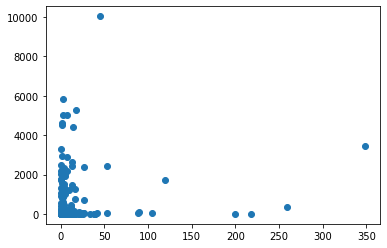

MAPE vs std of １株当たり利益［累計］


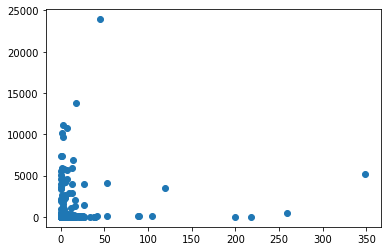

MAPE vs std of 当期純利益（連結）［累計］


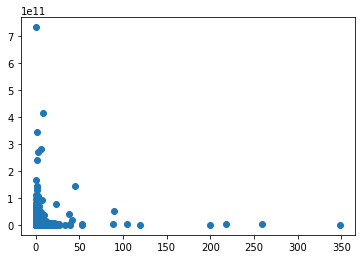

MAPE vs std of 【ＱＴＲ】当期利益


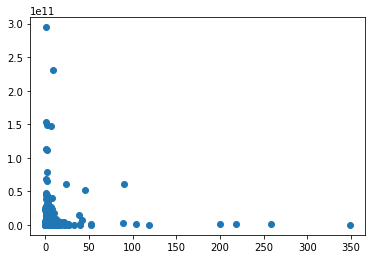

MAPE vs std of 棚卸資産


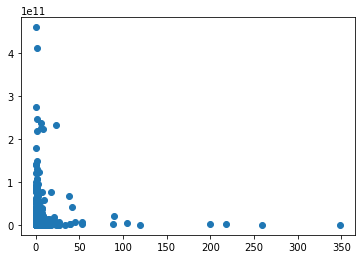

MAPE vs std of 受取手形・売掛金／売掛金及びその他の短期債権


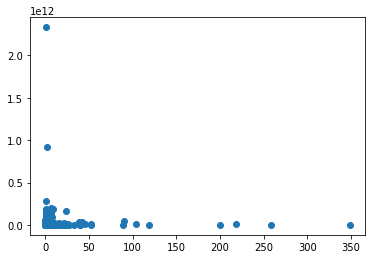

MAPE vs std of 資本的支出


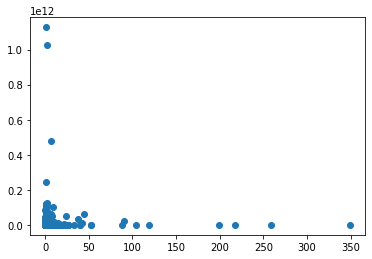

MAPE vs std of 売上総利益［累計］


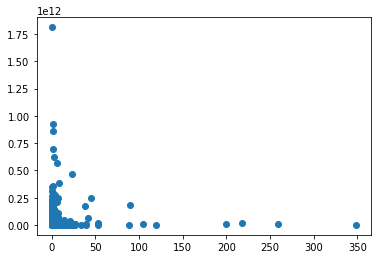

MAPE vs std of 【ＱＴＲ】売上総利益


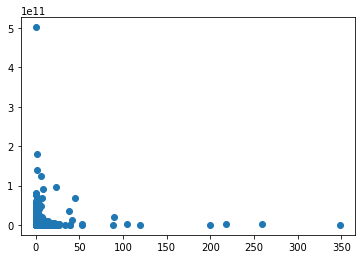

MAPE vs std of 販売費及び一般管理費［累計］


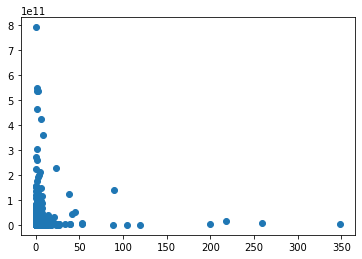

MAPE vs std of 法人税等［累計］


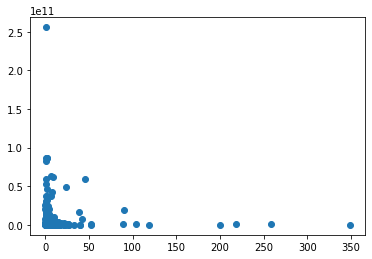

MAPE vs std of 法人税・住民税及び事業税合計／当期税金費用［累計］


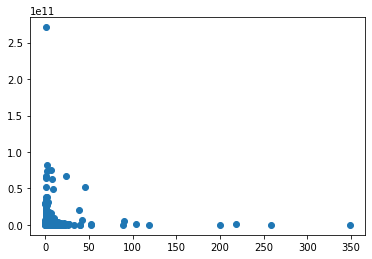

MAPE vs std of 税金等調整前当期純利益［累計］


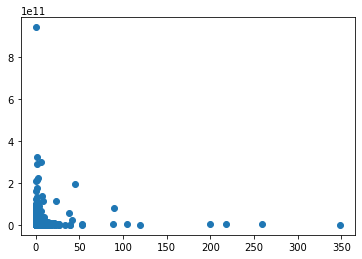

MAPE vs std of 税金等調整前当期利益［累計］


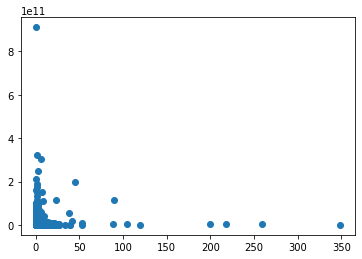

MAPE vs std of 【ＱＴＲ】税金等調整前当期利益


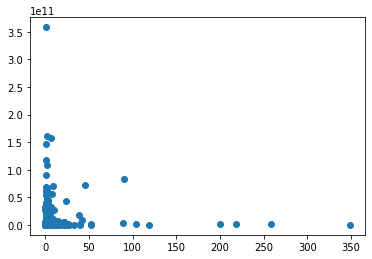

MAPE vs std of １株当たり税引前利益


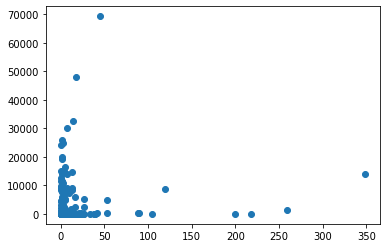

MAPE vs std of 売上高・営業収益［累計］


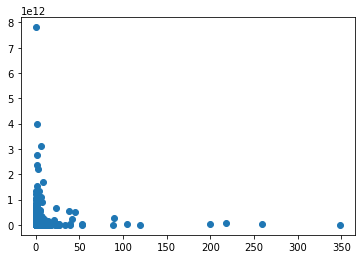

MAPE vs std of 【ＱＴＲ】売上高・営業収益


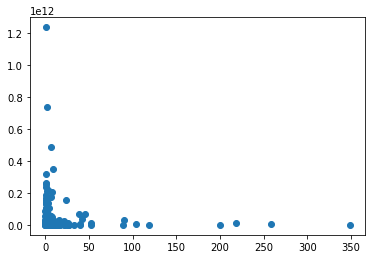

MAPE vs std of １株当たり売上高


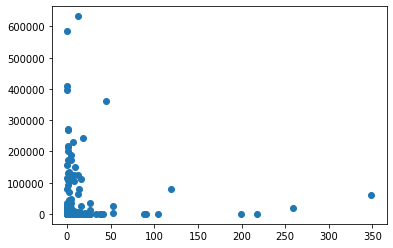

MAPE vs std of 期末従業員数


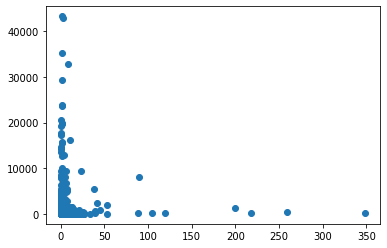

MAPE vs std of 純資産合計／資本合計


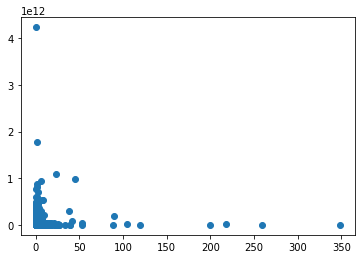

MAPE vs std of 【ＱＴＲ】純資産


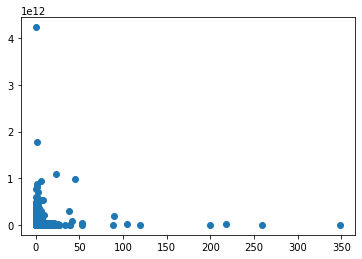

MAPE vs std of １株当たり純資産


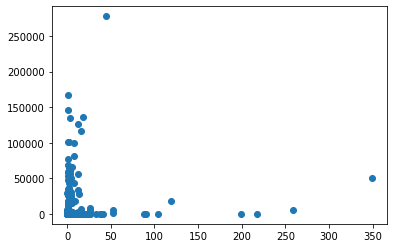

MAPE vs std of 期中平均株式数［累計］


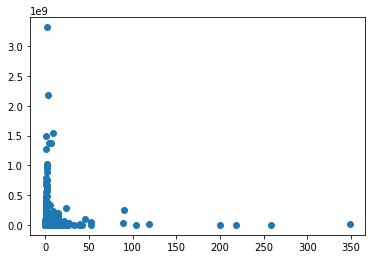

MAPE vs std of 期中平均株式数［３ヵ月］


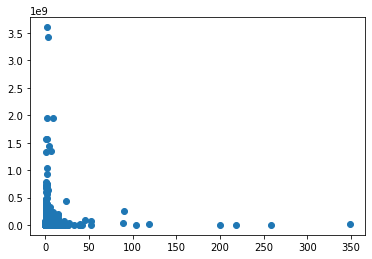

MAPE vs std of 期末発行済株式総数


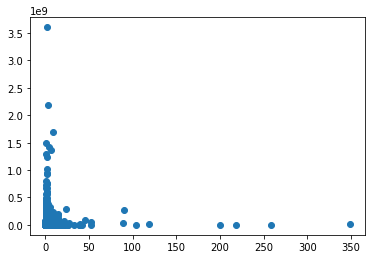

MAPE vs std of 自己株式数


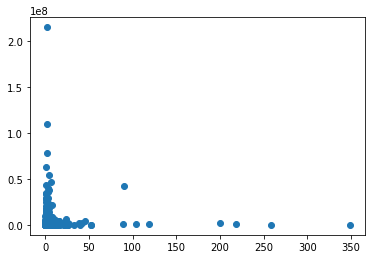

MAPE vs std of 当期純利益（連結）［３ヵ月］


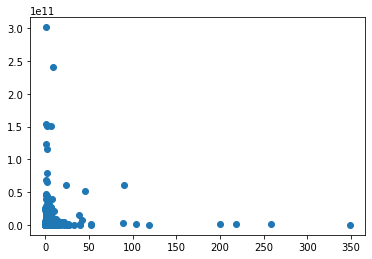

MAPE vs std of 売上総利益［３ヵ月］


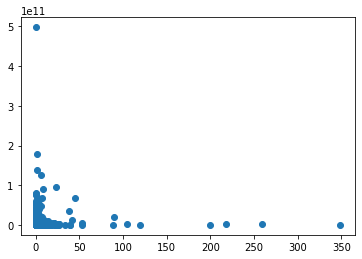

MAPE vs std of 販売費及び一般管理費［３ヵ月］


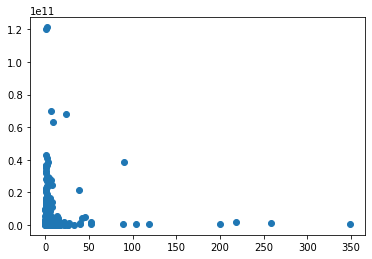

MAPE vs std of 法人税等［３ヵ月］


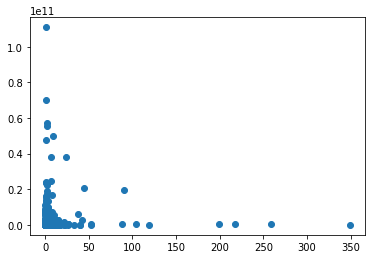

MAPE vs std of 税金等調整前当期純利益［３ヵ月］


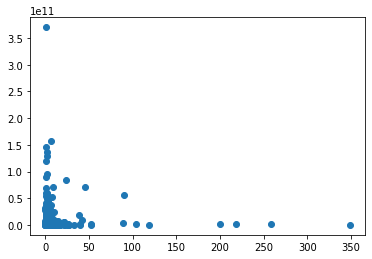

MAPE vs std of 売上高・営業収益［３ヵ月］


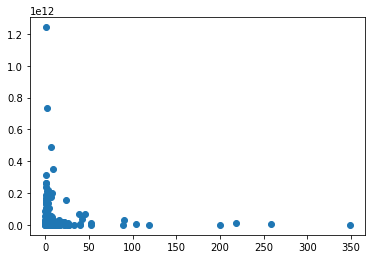

In [48]:
for i in variable_std.columns[15:]:
    print("MAPE vs std of", i)
    plt.scatter(x = variable_std[('y_hat_mmlp_tuned_scaled', 'MAPE')], y=variable_std[i])
    plt.show()

In [49]:
df_std = pd.concat([ai.unstack(level=1), df.groupby(level=0).std().loc[ai.index.get_level_values(0)]], axis=1)
df_std.describe()

,"(y_test, MAPE)","(y_hat_rw, MAPE)","(y_hat_sarima_br, MAPE)","(y_hat_sarima_f, MAPE)","(y_hat_sarima_g, MAPE)","(y_hat_umlp, MAPE)","(y_hat_mlm1, MAPE)","(y_hat_mlm2, MAPE)","(y_hat_mlm3, MAPE)","(y_hat_mlm4, MAPE)","(y_hat_mmlp_tuned_scaled, MAPE)",EPS,INV,AR,CAPX,GM,SA,ETR,LF
count,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,5.778863,14.285043,15.209637,31.944189,3.837378,147.873598,838.026125,1293.010297,281.577790,595.389360,418.428522,1.823501,0.203809
std,0.0,24.340679,225.215044,10.140076,88.594166,342.113625,50.936578,305.926501,317.366629,234.626426,17.536818,611.032767,5751.131074,6347.772162,2026.558427,2836.332069,2121.130329,6.635715,0.128694
min,0.0,0.108712,0.049801,0.079664,0.071814,0.108270,0.051167,0.094949,0.090533,0.185546,0.107655,0.612846,0.196420,0.934989,0.523675,1.852632,0.261808,0.043518,0.028946
25%,0.0,0.633784,0.468086,0.496089,0.507989,0.586712,0.629979,0.663215,0.677769,1.664993,0.560870,17.513953,40.989475,70.510900,17.556821,31.329511,13.512282,0.254487,0.127535
50%,0.0,1.307412,0.978257,0.994169,1.056402,1.064089,1.286960,1.464974,1.552599,4.958196,1.144925,29.119322,103.431884,170.232161,33.703318,58.500545,32.018292,0.584667,0.171276
75%,0.0,2.604576,1.865236,1.934714,2.136072,2.290723,2.953894,3.314285,3.480510,13.595323,2.279961,50.335498,293.596132,461.828514,69.944469,119.711808,85.539619,1.316403,0.244424
max,0.0,492.518013,7428.137986,172.733304,2896.696746,11262.841325,1627.680038,10088.018752,10460.852271,5240.955894,348.793877,10032.260384,125267.267139,93022.749693,41441.779890,40630.392324,36654.256083,122.266167,1.625121


MAPE vs std of EPS


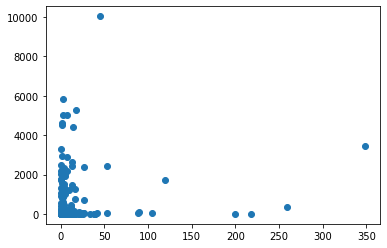

MAPE vs std of INV


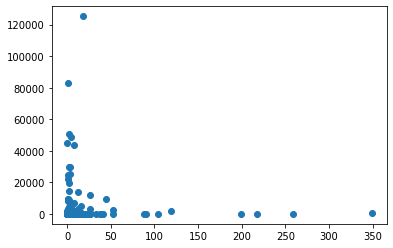

MAPE vs std of AR


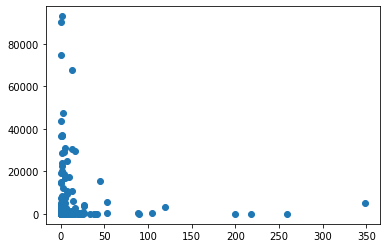

MAPE vs std of CAPX


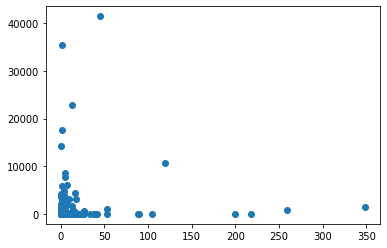

MAPE vs std of GM


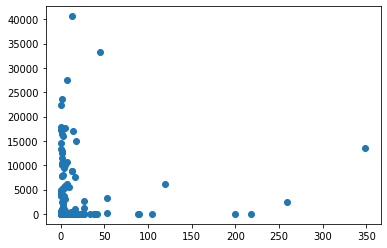

MAPE vs std of SA


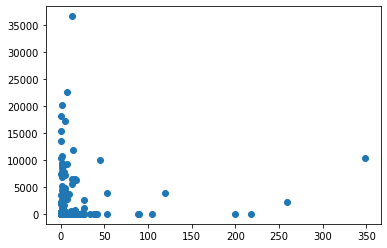

MAPE vs std of ETR


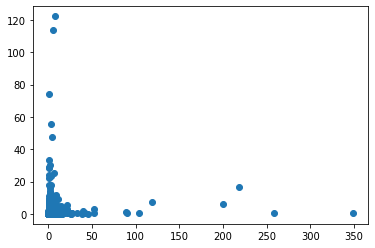

MAPE vs std of LF


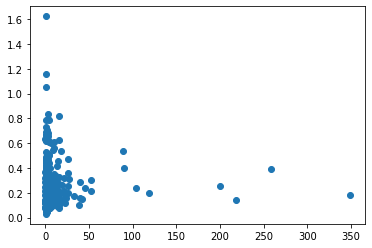

In [50]:
for i in df_std.columns[11:]:
    print("MAPE vs std of", i)
    plt.scatter(x = df_std[('y_hat_mmlp_tuned_scaled', 'MAPE')], y=df_std[i])
    plt.show()

変数のばらつきと予測精度はそんなに関係なさそう、データが原因じゃないのかも?

# logをみて、下手なモデルの特徴を考察する

In [51]:
log = pd.read_csv("./../assets/y_hats/multivariate/log_tuned_scaled0911.csv", index_col=[0, 1, 2])
log

rolling_sample  pruned_trials  complete_trials  \
企業名   会計年度 四半期                                                   
あらた   2018 Q1                0             57               43   
           Q2                1             53               47   
           Q3                2             58               42   
           Q4                3             56               44   
      2019 Q1                4             44               56   
...                        ...            ...              ...   
ｅＢＡＳＥ 2019 Q4                7             64               36   
      2020 Q1                8             77               23   
           Q2                9             56               44   
           Q3               10             61               39   
           Q4               11             58               42   

                best_trial_val_error  \
企業名   会計年度 四半期                         
あらた   2018 Q1               0.053011   
           Q2               0.055946   
           Q3               0.039247   
           Q4               0.032580   
      2019 Q1               0.033442   
...                              ...   
ｅＢＡＳＥ 2019 Q4               0.327881   
      2020 Q1               0.356410   
           Q2               0.404235   
           Q3               0.284561   
           Q4               0.288628   

                                                best_trial_params  \
企業名   会計年度 四半期                                                      
あらた   2018 Q1   dict_items([('hidden_units', 960), ('learning_...   
           Q2   dict_items([('hidden_units', 792), ('learning_...   
           Q3   dict_items([('hidden_units', 893), ('learning_...   
           Q4   dict_items([('hidden_units', 803), ('learning_...   
      2019 Q1   dict_items([('hidden_units', 567), ('learning_...   
...                                                           ...   
ｅＢＡＳＥ 2019 Q4   dict_items([('hidden_units', 369), ('learning_...   
      2020 Q1   dict_items([('hidden_units', 426), ('learning_...   
           Q2   dict_items([('hidden_units', 374), ('learning_...   
           Q3   dict_items([('hidden_units', 558), ('learning_...   
           Q4   dict_items([('hidden_units', 706), ('learning_...   

                final_train_epochs  \
企業名   会計年度 四半期                       
あらた   2018 Q1                    9   
           Q2                    9   
           Q3                    9   
           Q4                    9   
      2019 Q1                  294   
...                            ...   
ｅＢＡＳＥ 2019 Q4                 9099   
      2020 Q1                10000   
           Q2                10000   
           Q3                10000   
           Q4                10000   

                                           final_train_min_loss      y_test  \
企業名   会計年度 四半期                                                                
あらた   2018 Q1       tensor(308.3252, grad_fn=<MseLossBackward>)  105.420000   
           Q2       tensor(321.2754, grad_fn=<MseLossBackward>)   90.440000   
           Q3       tensor(293.8550, grad_fn=<MseLossBackward>)  106.240000   
           Q4       tensor(392.9936, grad_fn=<MseLossBackward>)   99.220000   
      2019 Q1         tensor(0.1850, grad_fn=<MseLossBackward>)  116.850000   
...                                                         ...         ...   
ｅＢＡＳＥ 2019 Q4    tensor(425689.0312, grad_fn=<MseLossBackward>)   18.657982   
      2020 Q1    tensor(852539.4375, grad_fn=<MseLossBackward>)    2.010000   
           Q2   tensor(1686596.6250, grad_fn=<MseLossBackward>)    3.810000   
           Q3    tensor(520527.5625, grad_fn=<MseLossBackward>)    3.070000   
           Q4   tensor(1682234.2500, grad_fn=<MseLossBackward>)    9.989366   

                     y_hat  
企業名   会計年度 四半期              
あらた   2018 Q1    60.607697  
           Q2    75.818980  
           Q3    61.267445  
           Q4    66.711740  
      2019 Q1   108.427100  
...         

In [52]:
log["final_train_min_loss"] = log["final_train_min_loss"].apply(lambda x: float(x.split("(")[1].split(",")[0]))
log["best_hidden_units"] = log["best_trial_params"].apply(lambda x: int(x.split()[1].split(")")[0]))
log["best_learning_rate"] = log["best_trial_params"].apply(lambda x: float(x.split()[3].split(")")[0]))
log["absolute_percentage_error"] = np.abs((log["y_test"] - log["y_hat"]) / log["y_test"])
log["absolute_percentage_error_ub"] = error_p_abs_ub["y_hat_mmlp_tuned_scaled"]

In [53]:
log.describe()

,rolling_sample,pruned_trials,complete_trials,best_trial_val_error,final_train_epochs,final_train_min_loss,y_test,y_hat,best_hidden_units,best_learning_rate,absolute_percentage_error,absolute_percentage_error_ub
count,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,1.306800e+04,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,5.500000,64.466024,35.533976,0.448034,2084.401133,6.280738e+04,34.002534,38.847190,522.968243,0.085365,3.837378,0.566839
std,3.452185,7.672118,7.672118,0.354402,3631.255830,1.232699e+06,80.694380,151.533473,275.394600,0.128597,56.772584,0.362498
min,0.000000,35.000000,7.000000,0.000995,7.000000,4.815900e-14,-2139.110000,-1096.853900,1.000000,0.000010,0.000018,0.000018
25%,2.750000,60.000000,31.000000,0.098734,46.750000,2.788350e-06,8.137500,9.865165,303.000000,0.008221,0.229096,0.229096
50%,5.500000,64.000000,36.000000,0.367740,240.000000,1.227550e+00,26.710000,26.825831,542.000000,0.045376,0.519802,0.519802
75%,8.250000,69.000000,40.000000,0.821480,1279.250000,1.402370e+02,54.907500,53.209479,753.000000,0.106480,1.227357,1.000000
max,11.000000,93.000000,65.000000,2.088031,10000.000000,5.465736e+07,1372.870000,11429.771000,1000.000000,0.998647,3937.530700,1.000000


APE vs  rolling_sample


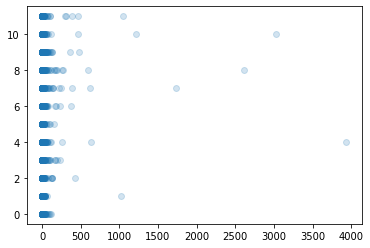

APE vs  pruned_trials


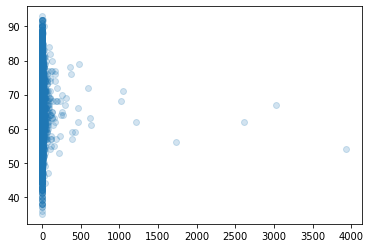

APE vs  complete_trials


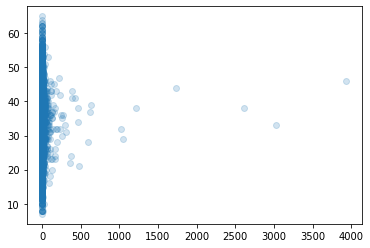

APE vs  best_trial_val_error


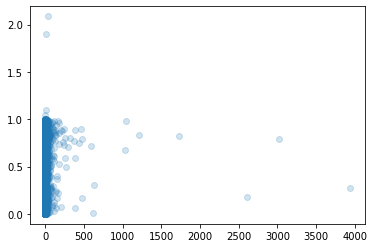

APE vs  final_train_epochs


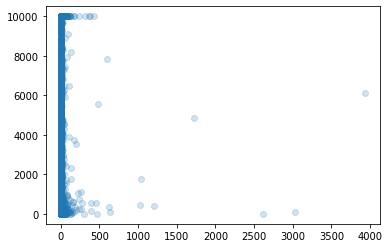

APE vs  final_train_min_loss


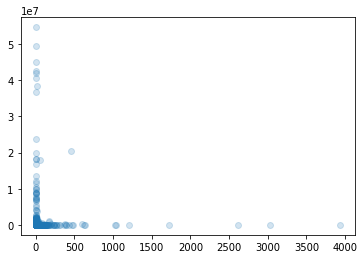

APE vs  y_test


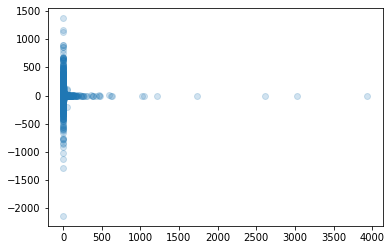

APE vs  y_hat


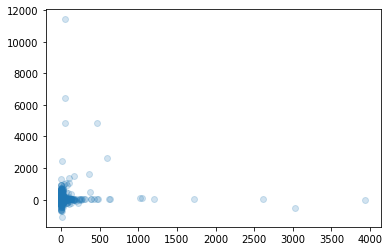

APE vs  best_hidden_units


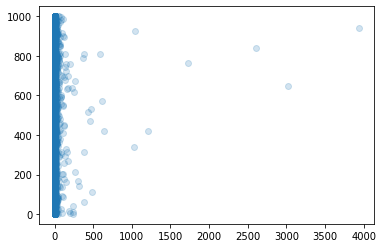

APE vs  best_learning_rate


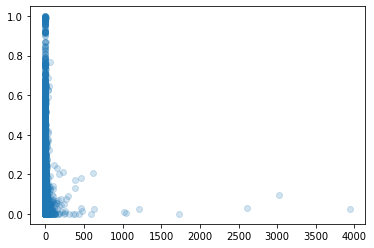

APE vs  absolute_percentage_error


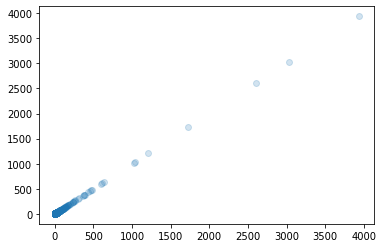

APE vs  absolute_percentage_error_ub


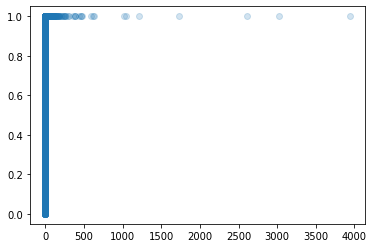

In [54]:
for i in log.describe().columns:
    print("APE vs ", i)
    plt.scatter(x=log["absolute_percentage_error"], y=log[i], alpha=0.2)
    plt.show()

* APE vs  final_train_epochsより、epochs数が0付近または10000付近だとMAPEが大きい --> trainがそもそもうまくいってない?
* APE vs  final_train_min_loss より、final train の lossが0付近だとAPEが大きい。 --> over fitting? --> ｙ軸の桁が対数
* APE vs  y_test より、y_testが 0 付近だと APEが大きい --> yが小さいと当たらない?(y_hatも0に近いと当たらない。) --> ubでみるとそうでもない? --> 誤差率のトレードオフ

APE vs  rolling_sample


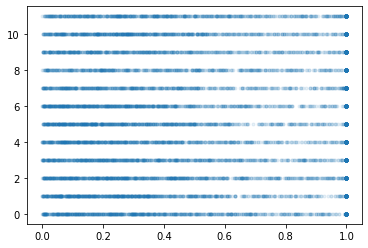

APE vs  pruned_trials


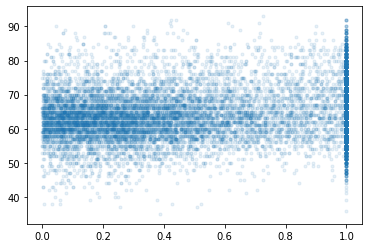

APE vs  complete_trials


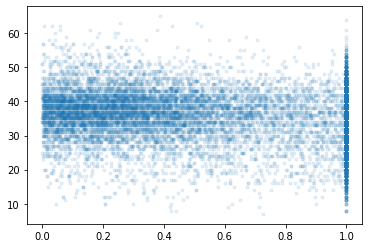

APE vs  best_trial_val_error


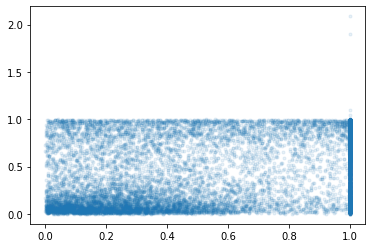

APE vs  final_train_epochs


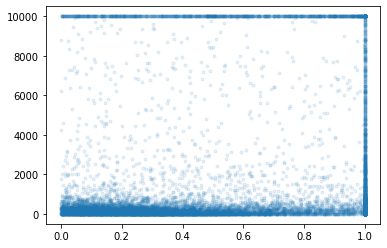

APE vs  final_train_min_loss


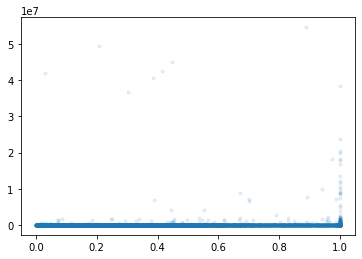

APE vs  y_test


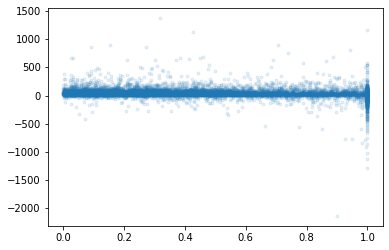

APE vs  y_hat


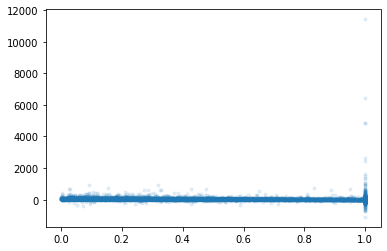

APE vs  best_hidden_units


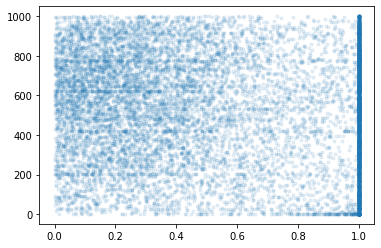

APE vs  best_learning_rate


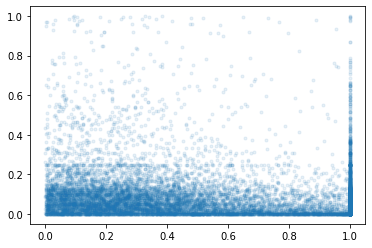

APE vs  absolute_percentage_error


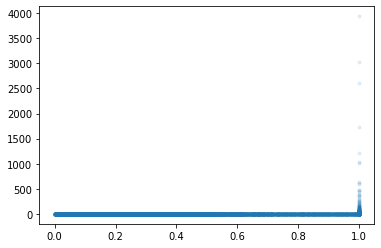

APE vs  absolute_percentage_error_ub


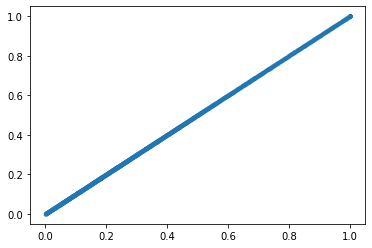

In [55]:
for i in log.describe().columns:
    print("APE vs ", i)
    plt.scatter(x=log["absolute_percentage_error_ub"], y=log[i], alpha=0.1, marker=".")
    plt.show()

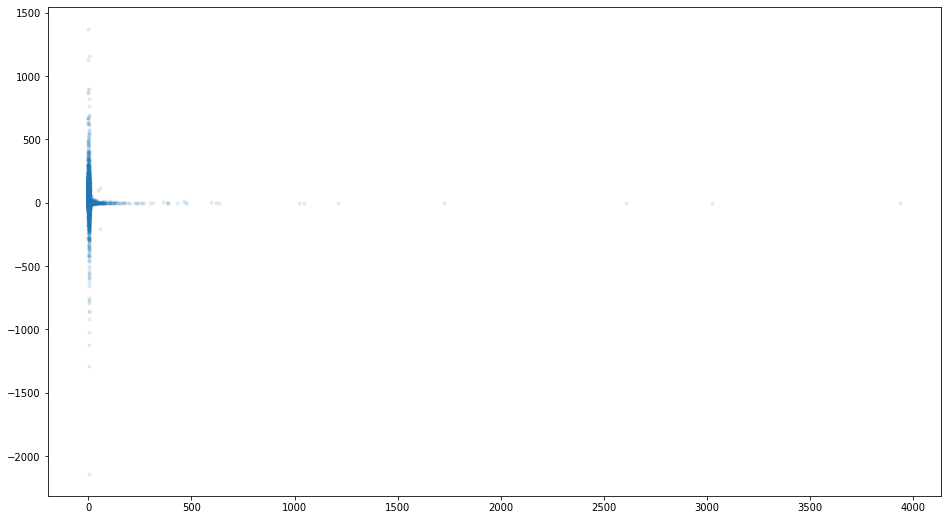

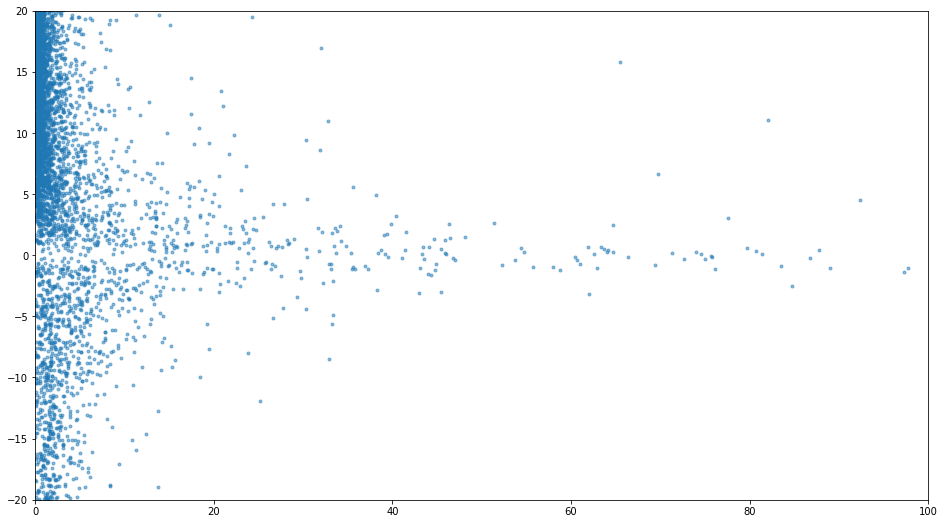

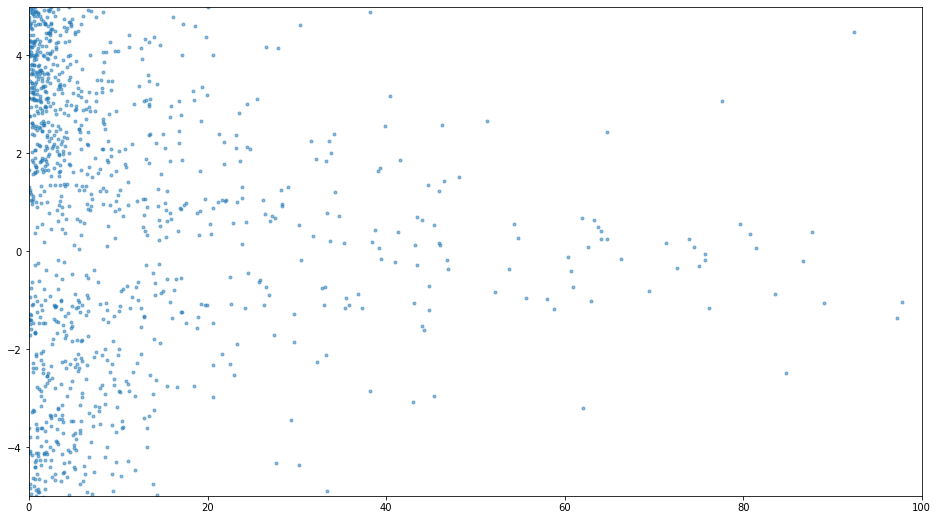

In [154]:
plt.figure(figsize=(16, 9))
plt.scatter(x=log["absolute_percentage_error"], y=log["y_test"], alpha=0.1, marker=".")
# plt.ylim(-100, 100)
# plt.xlim(0, 100)
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(x=log["absolute_percentage_error"], y=log["y_test"], alpha=0.5, marker=".")
plt.ylim(-20, 20)
plt.xlim(0, 100)
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(x=log["absolute_percentage_error"], y=log["y_test"], alpha=0.5, marker=".")
plt.ylim(-5, 5)
plt.xlim(0, 100)
plt.show()

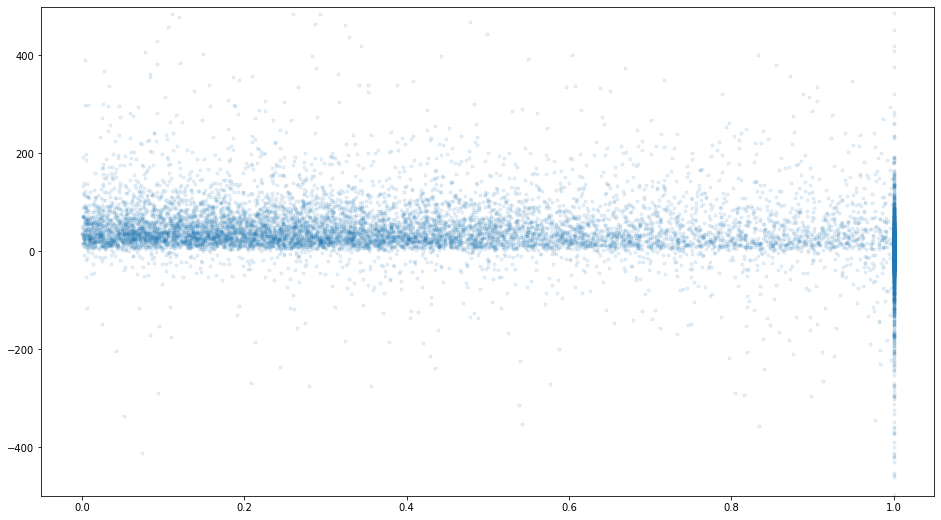

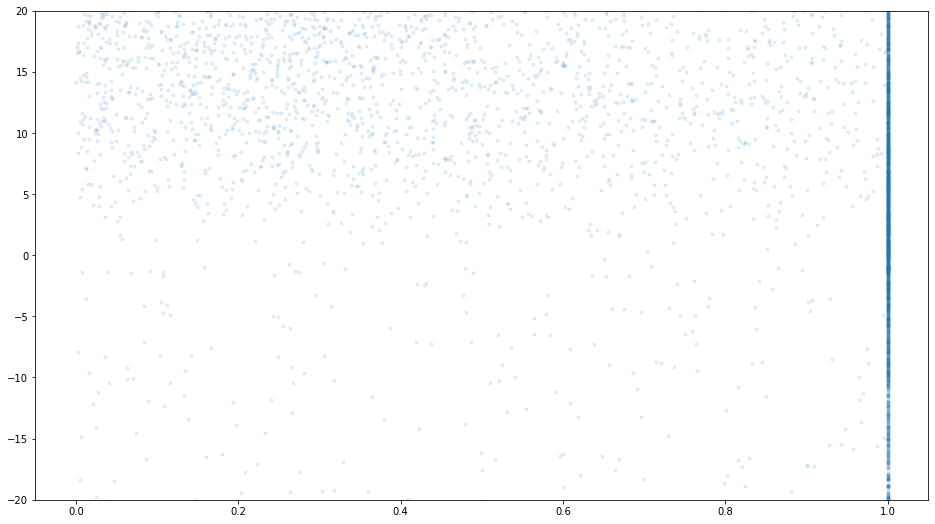

In [57]:
plt.figure(figsize=(16, 9))
plt.scatter(x=log["absolute_percentage_error_ub"], y=log["y_test"], alpha=0.1, marker=".")
plt.ylim(-500, 500)
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(x=log["absolute_percentage_error_ub"], y=log["y_test"], alpha=0.1, marker=".")
plt.ylim(-20, 20)
plt.show()

# Mean Absolute Error
0付近だと誤差率はでかくなる。 MAEで見てみる

In [157]:
indicators = {"MAE": MAE}

In [163]:
a_mae = accuracy_table(y_hats_all_tuned["y_test"], y_hats_all_tuned, indicators)
a_mae

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp_tuned_scaled
MAE,0.0,38.745586,38.468179,34.881795,39.409411,53.45291,60.126125,71.752135,82.168744,343.687207,39.40203


時間のかかるMMLPの価値は薄い